#  Definindo o problema

O objetivo deste projeto será avaliar quais atributos influenciam um usuário na compra de produtos online e prever quando uma sessão resultará em uma venda.

Usaremos como fonte de dados o dataset:

**Online Shoppers Purchasing Intention Dataset**

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' é a nossa variável target, ou seja, se a sessão gerou receita ou não.

**Dicionário de Dados:**

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" e "Product Related Duration" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Bounce Rate", "Exit Rate" e "Page Value" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Bounce Rate" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("Bounce") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Exit Rate" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Page Value" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Special Day" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de operating system, browser, region, traffic type, visitor type como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana (weekend) e mês do ano(Month).

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

In [1]:
# Importando pacotes

# Manipulação dos dados
import numpy as np
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Estatística
import pingouin as pg

# Pre-processamento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier


# Otimização
import optuna

# Seleção de atributos
from sklearn.feature_selection import SelectFromModel

# Métricas 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, matthews_corrcoef

# Avaliação de Métricas
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import CVScores, LearningCurve

# Filtrando avisos
import sys
import warnings
warnings.filterwarnings("ignore")


# Configurando o estilo de gráfico utilizado
%matplotlib inline
plt.rcParams["figure.figsize"] = 20, 10
plt.style.use('seaborn-darkgrid')

# PEP-8
%reload_ext nb_black

/home/bobcasta/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.7, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/bobcasta/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [2]:
# Carregando o dataset com pandas
df= pd.read_csv('online_shoppers_intention.csv') 

<IPython.core.display.Javascript object>

# Análise exploratória

In [71]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<IPython.core.display.Javascript object>

In [3]:
# Verificando as 10 primeiras linhas do dataset
df.head(10)

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   
5             0.0                      0.0            0.0   
6             0.0                     -1.0            0.0   
7             1.0                     -1.0            0.0   
8             0.0                      0.0            0.0   
9             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   
5                     0.0            19.0               154.216667   
6                    -1.0             1.0                -1.000000   
7                    -1.0             1.0                -1.000000   
8                     0.0             2.0                37.000000   
9                     0.0             3.0               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

<IPython.core.display.Javascript object>

In [4]:
# Checando o número de linhas e colunas do dataset
print('O número de linhas é: ', df.shape[0])
print('O número de colunas é: ', df.shape[1])

O número de linhas é:  12330
O número de colunas é:  18


<IPython.core.display.Javascript object>

In [5]:
# Verificando se há valores nulos
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

<IPython.core.display.Javascript object>

As oito primeiras variáveis apresentaram valores nulos.

In [6]:
# Verificando o type das colunas
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<IPython.core.display.Javascript object>

Agora vamos realizar algumas transformações nos dados.

Optamos por remover as linhas com os valores missing encontradas anteriormente, pois não haveria perda considerável de dados. Mas, vale ressaltar que valores missing são problemas que devemos buscar o motivo do porque aconteceram e verificar o que precisa ser feito para que não aconteça novamente.  

In [7]:
# Removendo as linhas com valores missing
df.dropna(inplace = True)

<IPython.core.display.Javascript object>

In [8]:
df.shape

(12316, 18)

<IPython.core.display.Javascript object>

Para ganharmos performance na análise exploratória e nas transformações das variáveis, criamos listas com as variáveis que são discretas (para transformar o type para int64), categóricas (para transformar com category e posteriormente, gerar subplots) e, as variáveis quantitativas (para gerar subplots).

In [9]:
# Selecionando as variáveis para modificar o type para int64
var_discreta = ['Administrative', 'Informational', 'ProductRelated']

<IPython.core.display.Javascript object>

In [10]:
# Selecionando as variáveis para modificar o type para category
var_categorica = ['Month', 'OperatingSystems', 
                  'Browser', 'Region', 'TrafficType', 
                  'VisitorType', 'Weekend', 
                  'SpecialDay', 'Revenue']

<IPython.core.display.Javascript object>

In [11]:
# Selecionando todas as variáveis quantitativas
var_quantitativa = ['Administrative', 'Administrative_Duration', 
                    'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates','ExitRates', 'PageValues']

<IPython.core.display.Javascript object>

In [12]:
# Convertendo para category
for i in df:
    df[var_categorica]=df[var_categorica].astype('category')

# Convertendo para int64
for i in df:
    df[var_discreta]=df[var_discreta].astype('int64')

<IPython.core.display.Javascript object>

A próxima transformação a ser feita é na variável SpecialDay. Esta assume determinados valor de acordo com a seguinte lógica:

   * ['dias_10_antes'] Se a sessão ocorreu 10 dias antes da data especial, a variável assume um valor diferente de zero.
   * ['ant_dep_sd'] Se a sessão ocorreu um dia antes ou um dia depois da data especial (a menos que esteja próximo de outro dia especial) assume um valor igual a zero.
   * ['dias_5_antes']E se a sessão ocorreu cinco dias antes da data especial essa assume o valor de 1.
    
Portanto, de acordo com essa regra, vamos renomear esses categrias, atribuir os devidos nomes uma vez que essa é uma variável categórica e mais a frente se tornará uma variável do tipo dummie.

In [13]:
# Aplicando a transformação na variável
df['SpecialDay'] = df['SpecialDay'].map({0.0: 'ant_dep_sd',
                                         0.2: 'dias_10_antes',
                                         0.4: 'dias_10_antes',
                                         0.6: 'dias_10_antes',
                                         0.8: 'dias_10_antes',
                                         1: 'dias_5_antes'
                        })
# Verificando a frequência do novo atributo
pd.crosstab(index=df['SpecialDay'], columns='Count')

col_0          Count
SpecialDay          
ant_dep_sd     11065
dias_10_antes   1097
dias_5_antes     154

<IPython.core.display.Javascript object>

In [14]:
# Ajustar o type novamente
df['SpecialDay']=df['SpecialDay'].astype('category')

<IPython.core.display.Javascript object>

In [15]:
# Checando novamente o type
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                 category
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

<IPython.core.display.Javascript object>

Com o type correto, vamos exibir algumas estatísticas das variáveis:

In [16]:
# Verificando o describe das variáveis categóricas
df[var_categorica].describe()

Month  OperatingSystems  Browser  Region  TrafficType  \
count   12316             12316    12316   12316        12316   
unique     10                 8       13       9           20   
top       May                 2        2       1            2   
freq     3363              6593     7951    4774         3909   

              VisitorType Weekend  SpecialDay Revenue  
count               12316   12316       12316   12316  
unique                  3       2           3       2  
top     Returning_Visitor   False  ant_dep_sd   False  
freq                10537    9451       11065   10408

<IPython.core.display.Javascript object>

In [17]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = int(y_value)
        #label = float("{0:.2f}".format(y_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            size = 13,                   # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

<IPython.core.display.Javascript object>

Vamos verificar quantas sessões geraram receita "Revenue" (True) e quantos não geraram (False). Além disso, verificar se há necessidade de realizar o balanceamento da variável antes do treinamento do algorítimo.

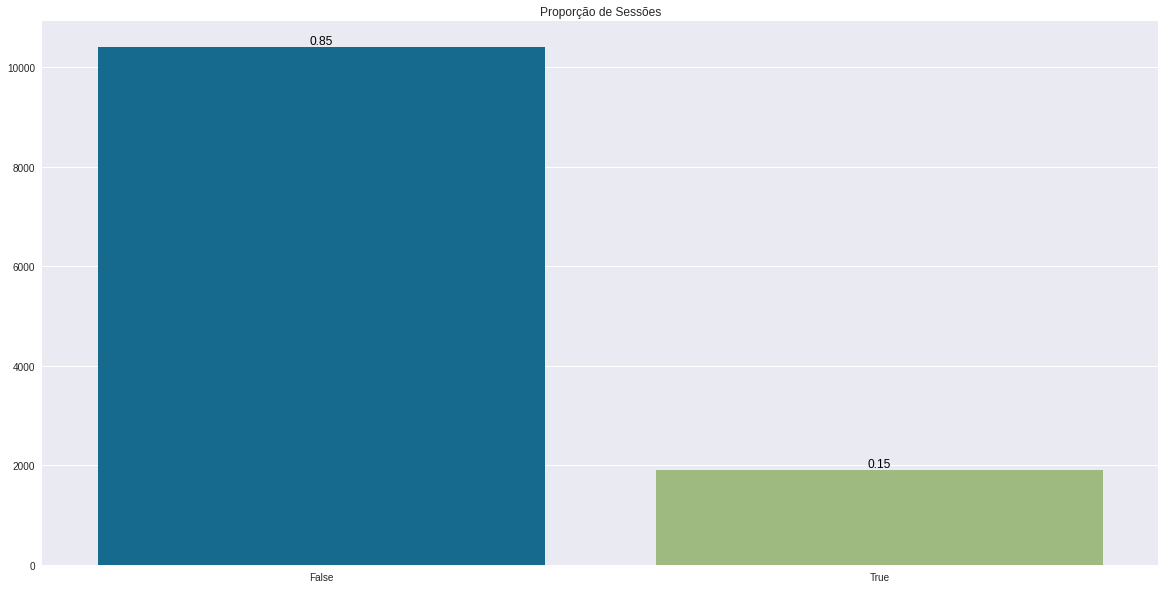

<IPython.core.display.Javascript object>

In [18]:
# Cria um gráfico de barras da variável "Revenue" 
ax = sns.barplot(x=df['Revenue'].value_counts().index, 
                 y=df['Revenue'].value_counts().values,
                 data=df)

total = float(len(df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, '{:1.2f}'.format(height/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Proporção de Sessões')
plt.show()

Portanto, haverá necessidade de balancear a nossa variável target. Há uma diferença muito grande entre a quantidade de acessos que geraram receita e que não geraram (85% das sessões não gerara, receita e apenas 15% gerou)  e isso trará problemas ao nosso modelo. Durante a etapa de pré-processamento trataremos esse problema.

Outra questão importante a ser mencionada é essa proporção dos dados, essa grande diferença entre a quantidade de sessões que geraram receita e que não geraram receita, neste caso é um dataset publico, que já passou por um processo de preparação antes que fosse disponibilizado ao público, portanto, essa discrepancia pode ser até de forma proposital. Caso esse fosse um problema do dia-a-dia do cientista de dados o correto seria voltarmos até a fonte de dados e realizarmos uma nova coleta de dados. Como este não é o caso, vamos ter que aplicar técnicas para balancear esses dados antes de entregarmos para o algorítmo.

Prosseguindo com a análise exploratória, vamos dividí-la em duas etapas: primeiro vamos entender o comportamento das variáveis categóricas, posteriormente, as variáveis numéricas,e, dessa forma, buscar entender a relação de todas variáveis com a nossa variável alvo.

In [19]:
# Resumo dos atributos categóricos
for i in df.select_dtypes(include='category'):
    print('Variavel: ' + (i), '\n', df[i].value_counts())

Variavel: SpecialDay 
 ant_dep_sd       11065
dias_10_antes     1097
dias_5_antes       154
Name: SpecialDay, dtype: int64
Variavel: Month 
 May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Variavel: OperatingSystems 
 2    6593
1    2582
3    2552
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
Variavel: Browser 
 2     7951
1     2459
4      735
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
Variavel: Region 
 1    4774
3    2402
4    1179
2    1134
6     804
7     761
9     511
8     434
5     317
Name: Region, dtype: int64
Variavel: TrafficType 
 2     3909
1     2444
3     2051
4     1069
13     737
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12      

<IPython.core.display.Javascript object>

Vamos verificar a frequência das variáveis categóricas, ou seja, a frequência de sessões de acordo com o que cada variável representa.

In [20]:
# Definindo variáveis categóricas
cat_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'SpecialDay', 'Weekend']

<IPython.core.display.Javascript object>

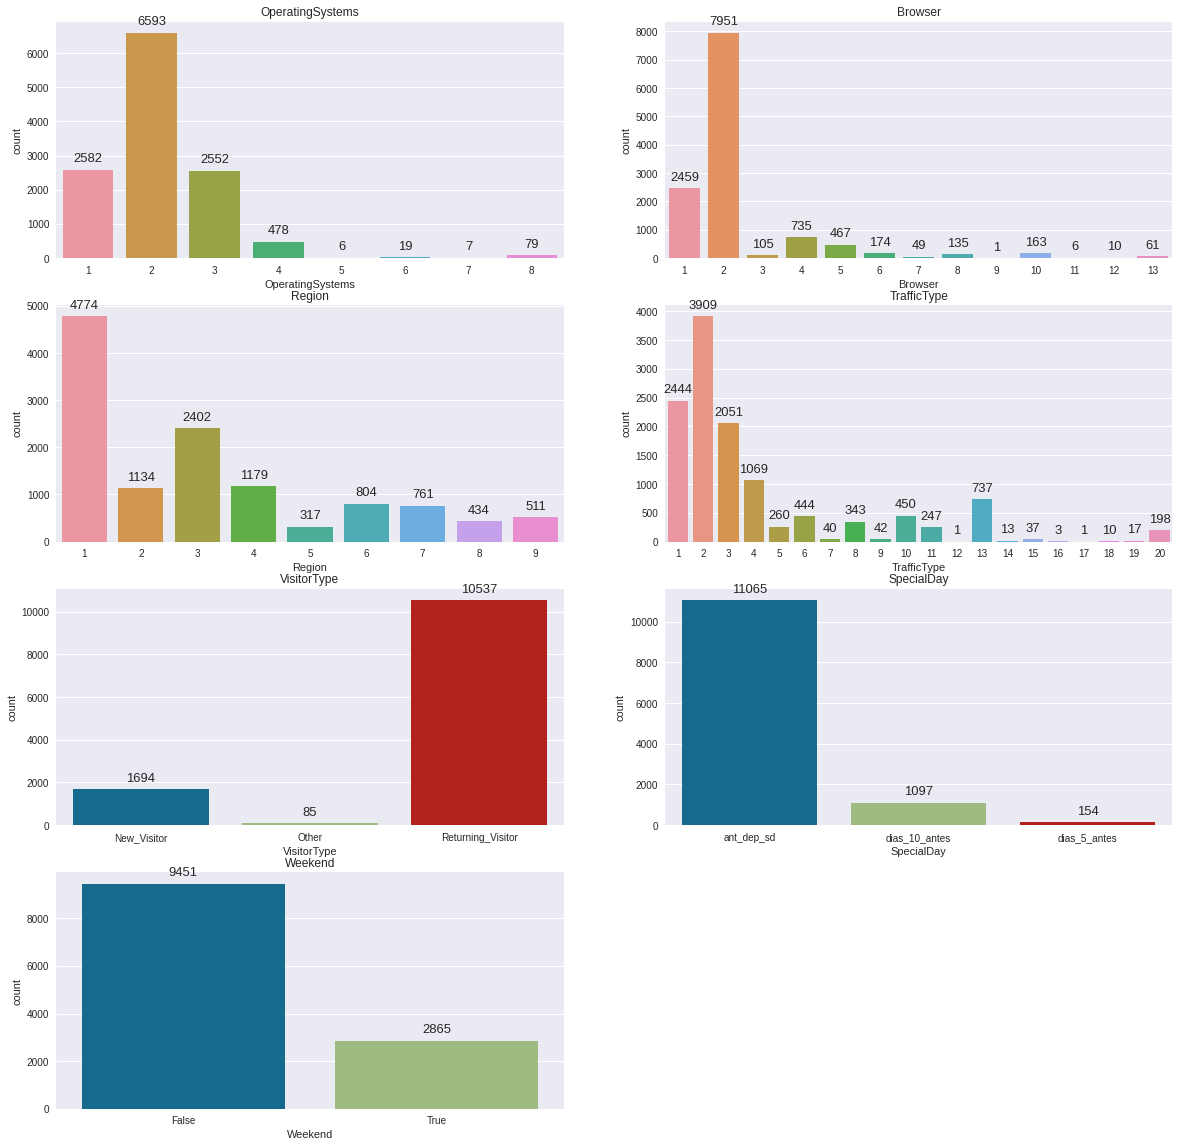

<IPython.core.display.Javascript object>

In [21]:
# Cria um subplot de dimensões 4 x 2
plt.figure(figsize=(20,20))

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(df[cat_vars]):
    ax = plt.subplot(4,2,idx+1)
    sns.countplot(df[col])
    ax.set_title(col)
    add_value_labels(ax)

# Mostra o gráfico
plt.show()

Avaliando os gráficos acima podemos observar que:

 * O sistema operacional mais usado pelos usuários que acessaram ao site é o sistema 2, segido pelos sistemas 1 e 3 quase em mesma proporção. 
 * O navegador mais utilizado é o navegador 2, seguido pelo 1. 
 * A região com maior número de sessões são as regiões 1 e 3.
 * O tipo de tráfego é, em maior quantidade, o 2, posteriormente, 1 e 3.
 * O tipo de visitante que mais acessou o site foram os que já acessaram mais de uma vez. Neste período houve menos visitantes novos.
 * A maioria das sessões ocorream um dia antes ou um dia depois de uma data especial.
 * E mais da metade das sessões não ocorreram no final de semana.
 

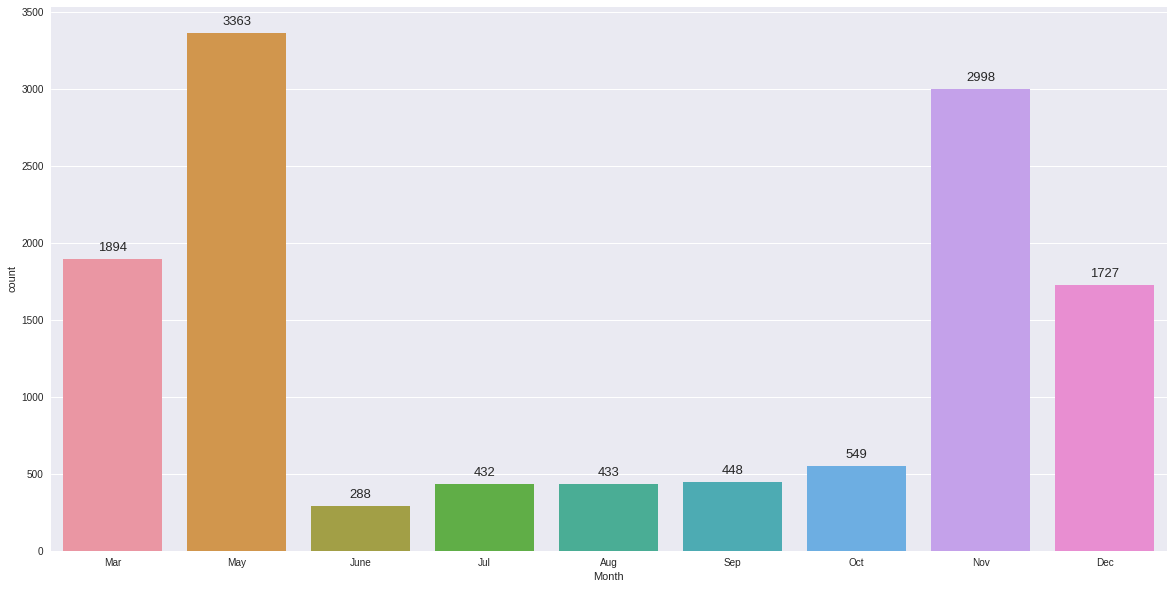

<IPython.core.display.Javascript object>

In [22]:
# Quantidade de acessos por mês
months_list=['Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sns.countplot(x=df['Month'], 
                   data=df, 
                   order=months_list)
add_value_labels(ax)

plt.show()

Nos plots a seguir, vamos compreender a frequência de sessões conforme cada atributo e segmentar por acessos que geraram e não gerarm receita.

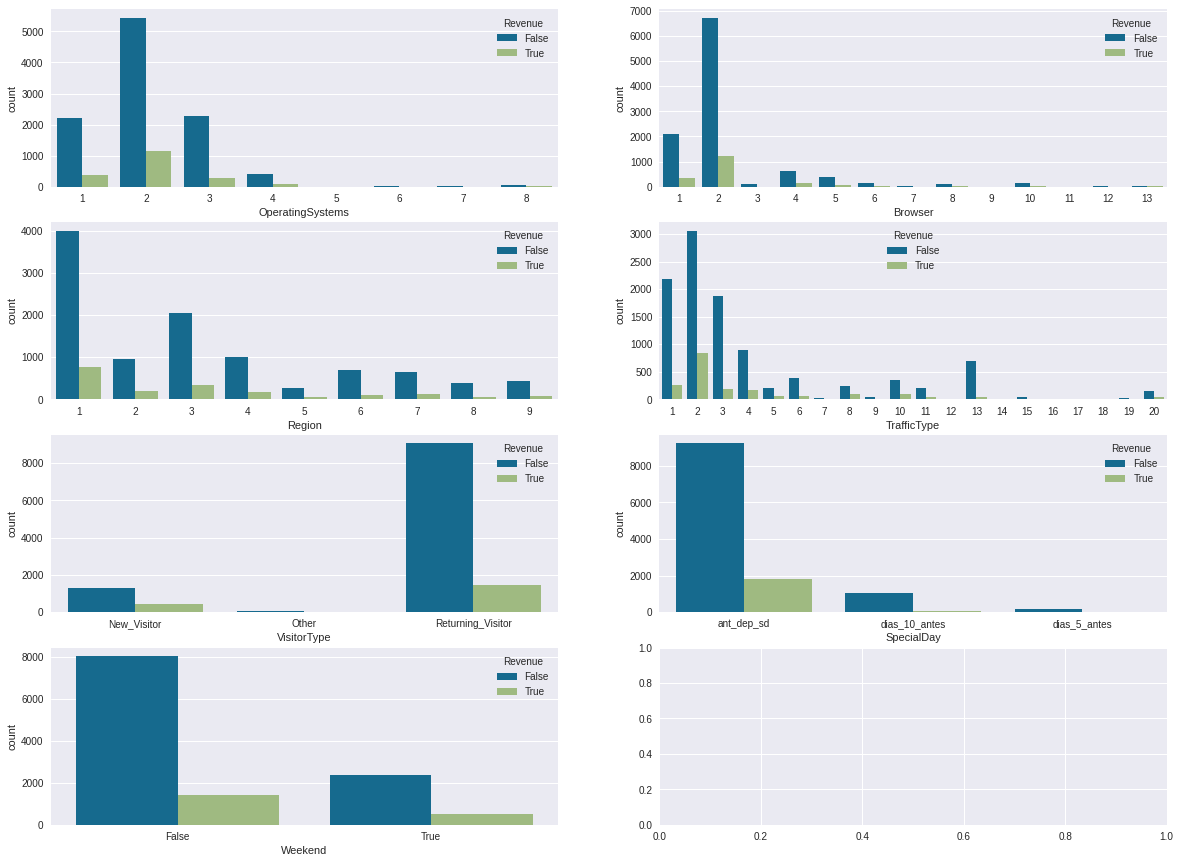

<IPython.core.display.Javascript object>

In [23]:
# Cria os subplots das variáveis categóricas em relação a variável target
fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flatten()

for ax, catplot in zip(axes, df[cat_vars]):
    sns.countplot(x=catplot, 
                  ax=ax, 
                  data=df, 
                  hue='Revenue')
plt.show()

Observando a frequencia das sessões por cada uma das variáveis dividias em 'True' (gerou receita) e 'False' (não gerou receita), a distribuição também é discrepante. 

<AxesSubplot:xlabel='Month'>

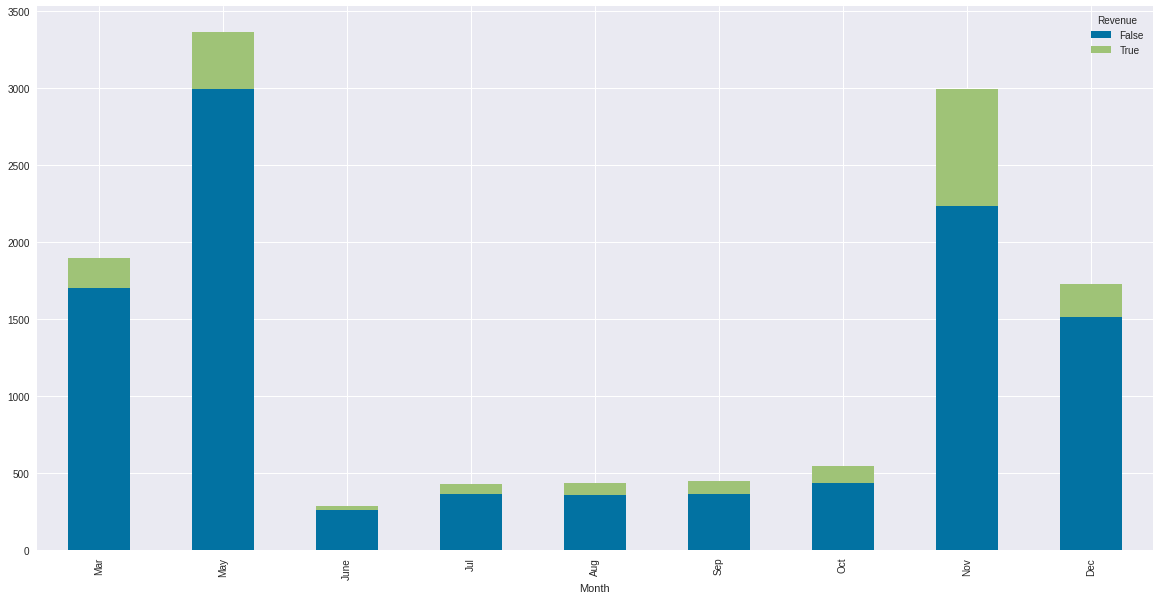

<IPython.core.display.Javascript object>

In [24]:
# Criando um dataframe para visualizarmos os m
rev_mon_val = pd.DataFrame(df.groupby(['Month'])['Revenue'].value_counts().unstack('Revenue'))

# Gerando a visualização
rev_mon_val.loc[['Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].plot(kind='bar', stacked=True)

O mês de novembro é o mês em que houve maior número de visitas e o mês que houve maior quantidade de sessões que geraram receita. 
Vale ressaltar que novembro é mês de blackfriday (um final onde as empresas fazem super descontos nos seus produtos). É um período em que o comércio eletônico tende a ficar bastante aquecido.

A seguir, vamos entender a taxa de conversão, ou seja do total de sessões qual o percentual que gerou receita. O intuito é entender se os meses que tiveram mais acessos foram os meses em que houve mais compras no site e, dessa forma, identificar se só trazer mais clientes para o site está sendo o suficiente. 

Posteriormente, vamos entender a média das taxas de BouceRate, ExitRate e PageValue por cada mês.

In [25]:
# Criando um dataframe com a quantidade mensal de sessões que geraram receita (Revenue=1) 
convertidos_mes = df.groupby('Month')['Revenue'].apply(lambda x: (x==1).sum()).reset_index(name='Sessoes_com_Receita')

# Criando um dataframe com a quantidade total mensal de sessões
total_mes = df.groupby('Month')['Revenue'].count().reset_index(name='Total_Sessao')

# Criando um dataframe a média de BounceRate por mês
media_Bounce_mes = pd.DataFrame(df.groupby('Month')['BounceRates'].mean().reset_index(name='Media_BR'))

# Criando um dataframe a média de ExitRate por mês
media_Exit_mes = pd.DataFrame(df.groupby('Month')['ExitRates'].mean().reset_index(name='Media_ER'))

# Criando um dataframe a média de PageValue por mês
media_Page_mes = pd.DataFrame(df.groupby('Month')['PageValues'].mean().reset_index(name='Media_PV'))

<IPython.core.display.Javascript object>

In [26]:
# unir os dataframes 
merge_1 = pd.merge(total_mes, convertidos_mes, on='Month')
merge_2 = pd.merge(merge_1, media_Bounce_mes, on='Month')
merge_3 = pd.merge(merge_2, media_Exit_mes, on='Month')
analise_mensal = pd.merge(merge_3, media_Page_mes, on='Month')

# Calcular a taxa de conversão
analise_mensal['taxa_convert'] = analise_mensal['Sessoes_com_Receita']/analise_mensal['Total_Sessao']
analise_mensal

Month  Total_Sessao  Sessoes_com_Receita  Media_BR  Media_ER  Media_PV  \
0   Aug           433                   76  0.018211  0.037727  5.938070   
1   Dec          1727                  216  0.020149  0.041303  6.833243   
2   Feb           184                    3  0.047021  0.074148  0.890363   
3   Jul           432                   66  0.024676  0.045330  4.104414   
4  June           288                   29  0.035102  0.058242  3.391440   
5   Mar          1894                  192  0.021513  0.044210  3.986860   
6   May          3363                  365  0.026845  0.048819  5.433189   
7   Nov          2998                  760  0.019259  0.038202  7.129379   
8   Oct           549                  115  0.011849  0.029011  8.645580   
9   Sep           448                   86  0.012183  0.030320  7.556826   

   taxa_convert  
0      0.175520  
1      0.125072  
2      0.016304  
3      0.152778  
4      0.100694  
5      0.101373  
6      0.108534  
7      0.253502  
8      0.209472  
9      0.191964

<IPython.core.display.Javascript object>

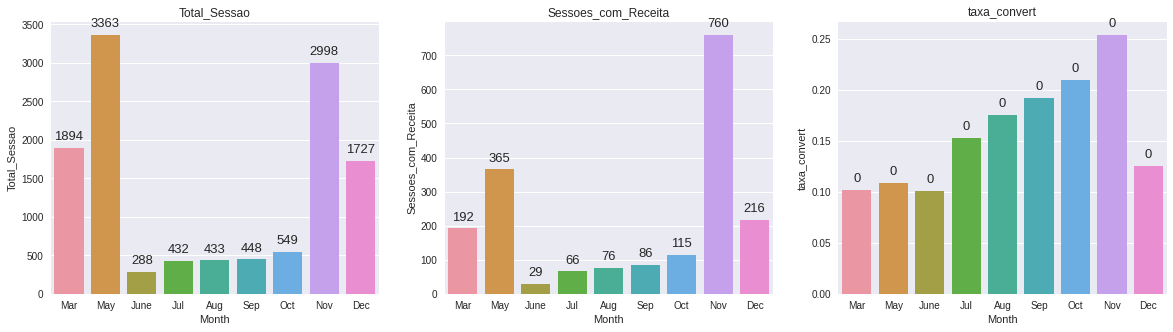

<IPython.core.display.Javascript object>

In [27]:
# Gerar gráfico com as métricas mensais
plt.figure(figsize=(20,5))

mensal_vars = ['Total_Sessao','Sessoes_com_Receita', 'taxa_convert']
months_list=['Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(analise_mensal[mensal_vars]):
    ax = plt.subplot(1,3,idx+1)
    sns.barplot(x= analise_mensal['Month'], y=analise_mensal[col], order=months_list)
    ax.set_title(col)
    add_value_labels(ax)

# Mostra o gráfico
plt.show()

Como podemos notar nas gráfico acima o mês de maio é o mês com maior quantidade de sessões, é o segundo mês com mais sessões que geraram receita e o terceiro com menor taxa de conversão. Ou seja, ter um alto volume de acessos não acarretou em maior número de compras no site.
Já o mês de novembro, foi o segundo mês com maior número de sessões, o mês com mais sessões que geraram receita e é o mês com a maior taxa de conversão, muito provavelmente devido ao fato de ser mês de blackfriday. 
Por fim, vale ressaltar o mês de outubro, foi o quarto mês com maior número de sessões, o quarto mês com com mais sessões que geraram receita e o segundo mês com maior taxa de conversão. Agora, cabe investigar quais foram as campanhas realizadas em outubro, se houve algum evento em especial e repetir ou se basear para futuras campanhas.

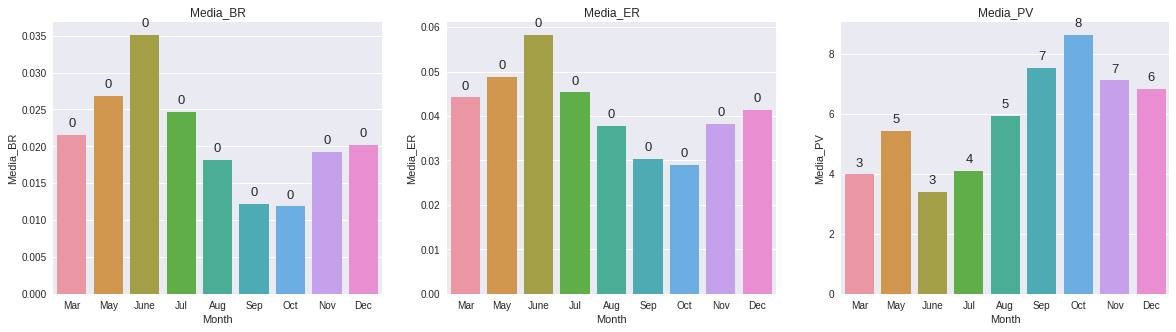

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(20,5))

mensal_vars = ['Media_BR', 'Media_ER', 'Media_PV']
months_list=['Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(analise_mensal[mensal_vars]):
    ax = plt.subplot(1,3,idx+1)
    sns.barplot(x=analise_mensal['Month'], y=analise_mensal[col], order=months_list)
    ax.set_title(col)
    add_value_labels(ax)

# Mostra o gráfico
plt.show()

Comentar os gráficos acima

A seguir, daremos início a análise exploratória das variáveis quantitativas, também iremos buscar entender a relação com a variável target.

In [29]:
# Verificando o describe das variáveis qunatitativas
df[var_quantitativa].describe()

Administrative  Administrative_Duration  Informational  \
count    12316.000000             12316.000000   12316.000000   
mean         2.317798                80.906176       0.503979   
std          3.322754               176.860432       1.270701   
min          0.000000                -1.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.500000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12316.000000    12316.000000             12316.000000   
mean                34.506387       31.763884              1196.037057   
std                140.825479       44.490339              1914.372511   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.000000               185.000000   
50%                  0.000000       18.000000               599.766190   
75%                  0.000000       38.000000              1466.479902   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues  
count  12316.000000  12316.000000  12316.000000  
mean       0.022152      0.043003      5.895952  
std        0.048427      0.048527     18.577926  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000  
50%        0.003119      0.025124      0.000000  
75%        0.016684      0.050000      0.000000  
max        0.200000      0.200000    361.763742

<IPython.core.display.Javascript object>

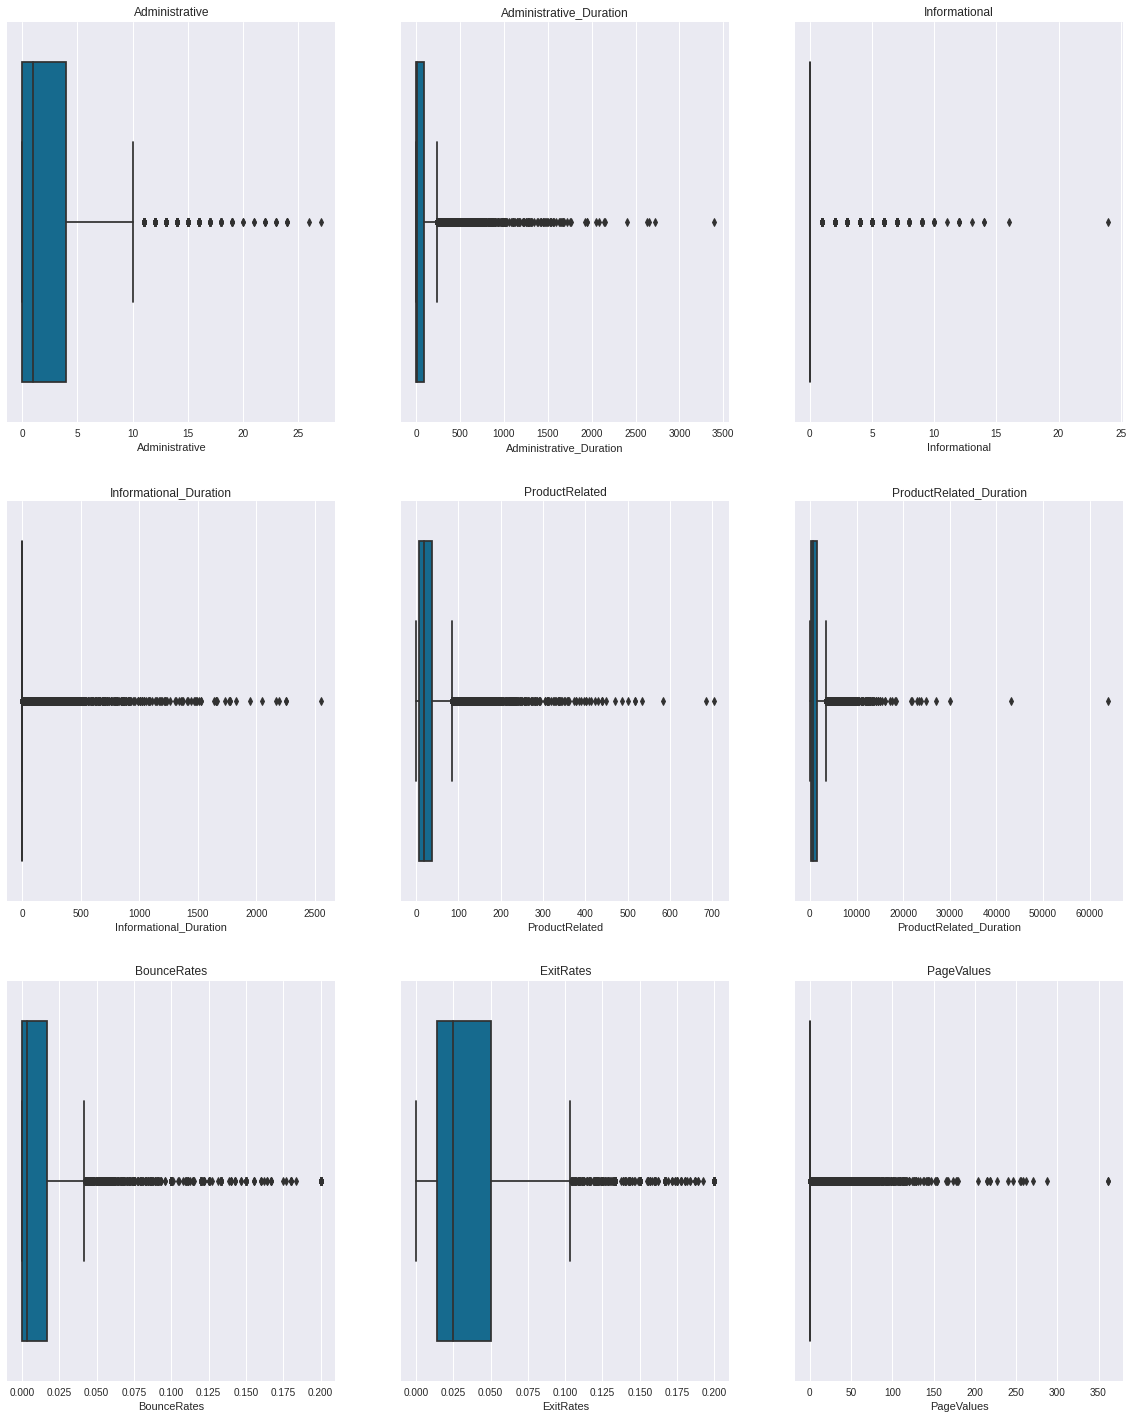

<IPython.core.display.Javascript object>

In [30]:
# Cria um subplot de dimensões 4 x 2
plt.figure(figsize=(20,25))

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(df[var_quantitativa]):
    ax = plt.subplot(3,3,idx+1)
    sns.boxplot(x=df[col])
    ax.set_title(col)


# Mostra o gráfico
plt.show()

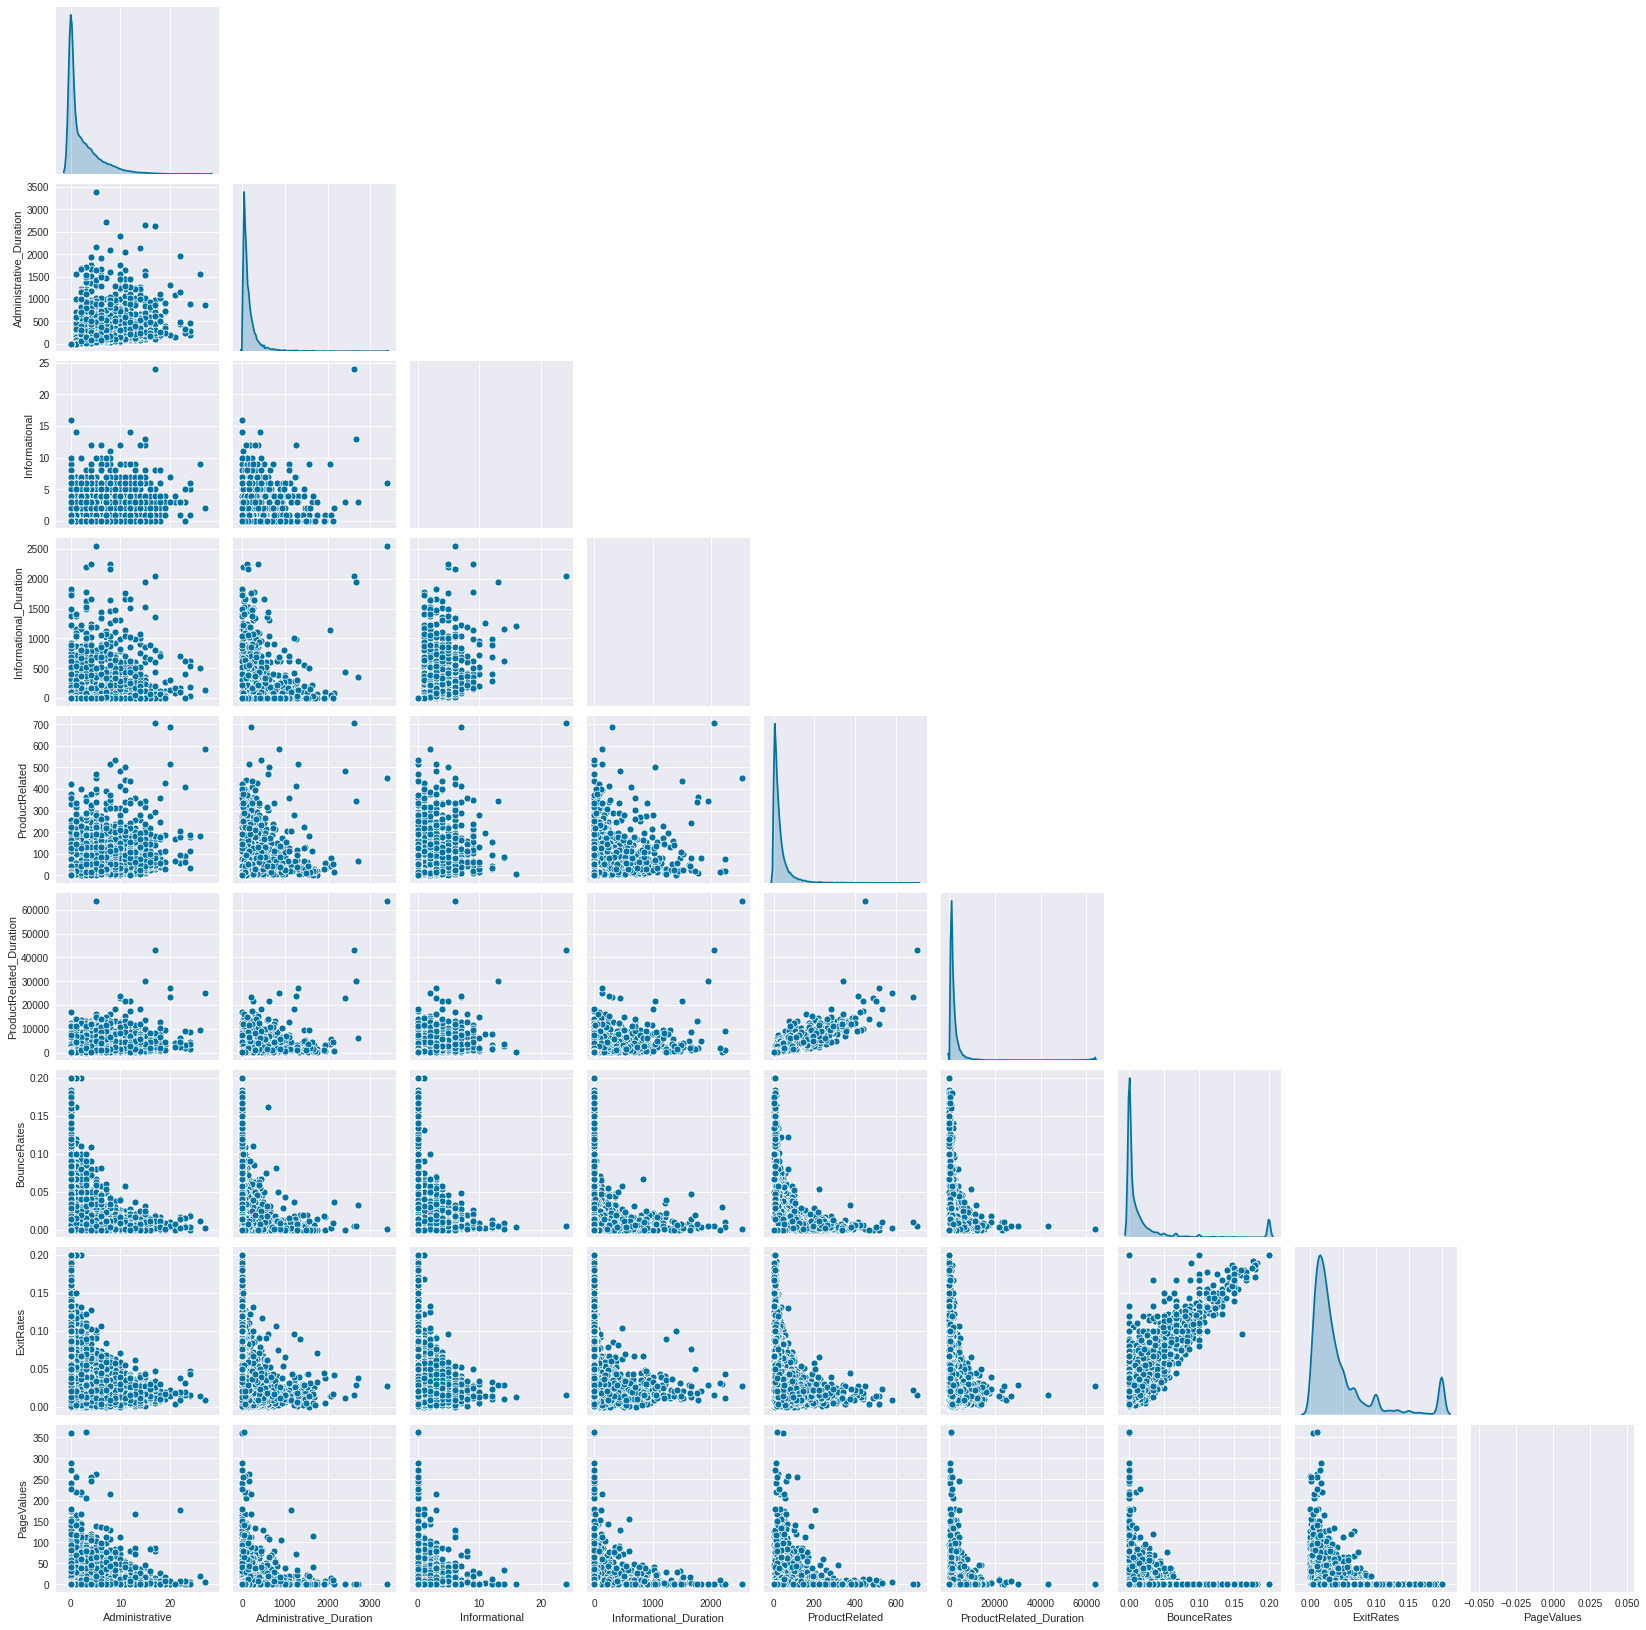

<IPython.core.display.Javascript object>

In [31]:
# Vamos avaliar a distribuição de frequência das variáveis quantitativas
sns.pairplot(df[var_quantitativa], 
             diag_kind='kde', 
             corner=True)
plt.show()

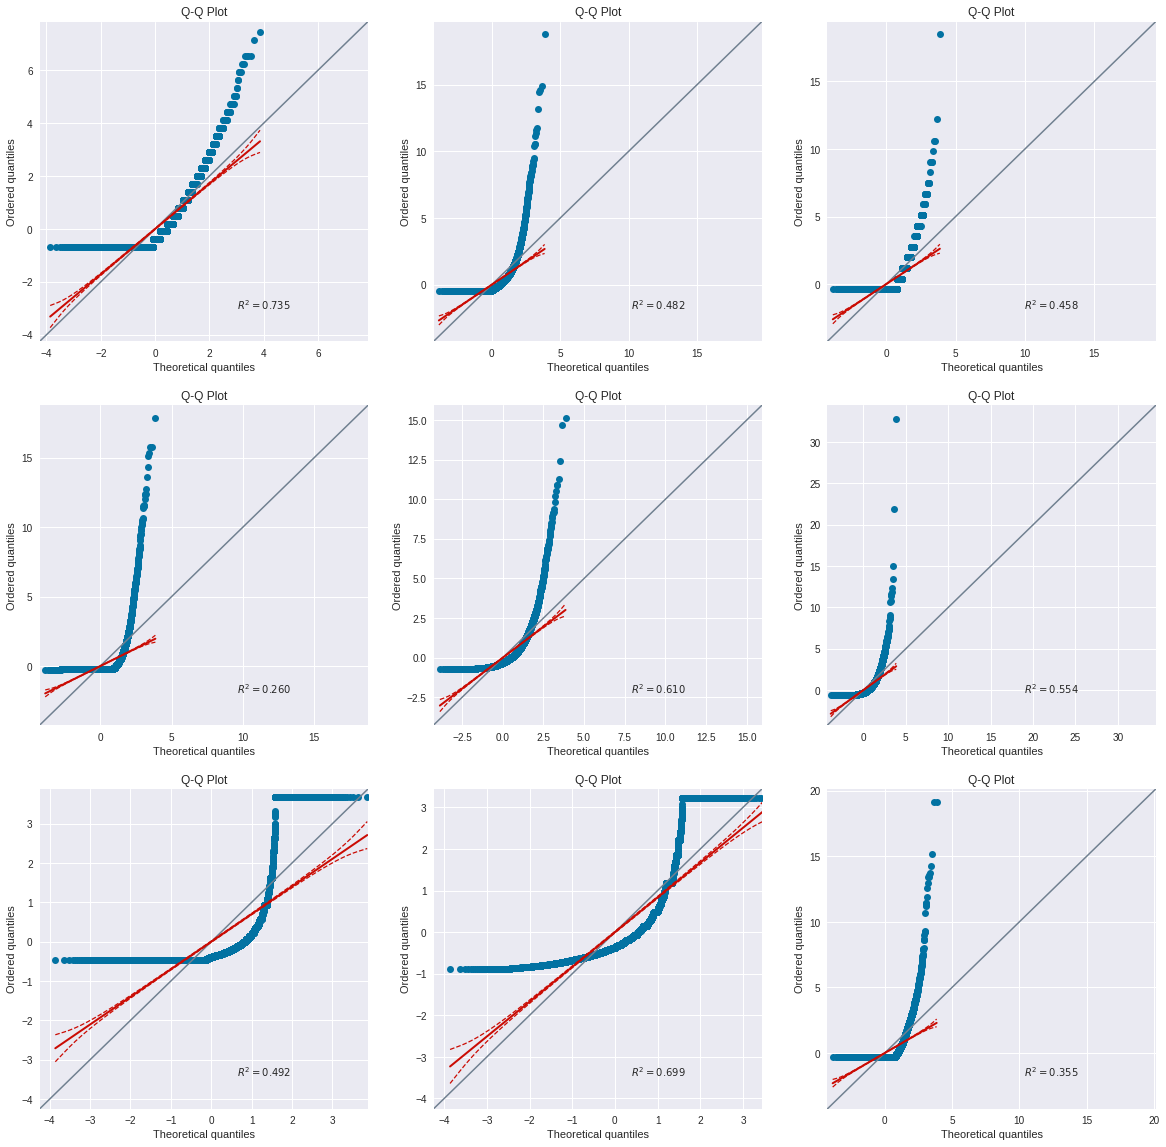

<IPython.core.display.Javascript object>

In [32]:
# Plotar o QQplot das variáveis categóricas

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20,20))
                                                            
ax1 = pg.qqplot(df['Administrative'], dist='norm', ax=ax1)
ax2 = pg.qqplot(df['Administrative_Duration'], dist='norm', ax=ax2)
ax3 = pg.qqplot(df['Informational'], dist='norm', ax=ax3)
ax4 = pg.qqplot(df['Informational_Duration'], dist='norm', ax=ax4)
ax5 = pg.qqplot(df['ProductRelated'], dist='norm', ax=ax5)
ax6 = pg.qqplot(df['ProductRelated_Duration'], dist='norm', ax=ax6)
ax7 = pg.qqplot(df['BounceRates'], dist='norm', ax=ax7)
ax8 = pg.qqplot(df['ExitRates'], dist='norm', ax=ax8)
ax9 = pg.qqplot(df['PageValues'], dist='norm', ax=ax9)

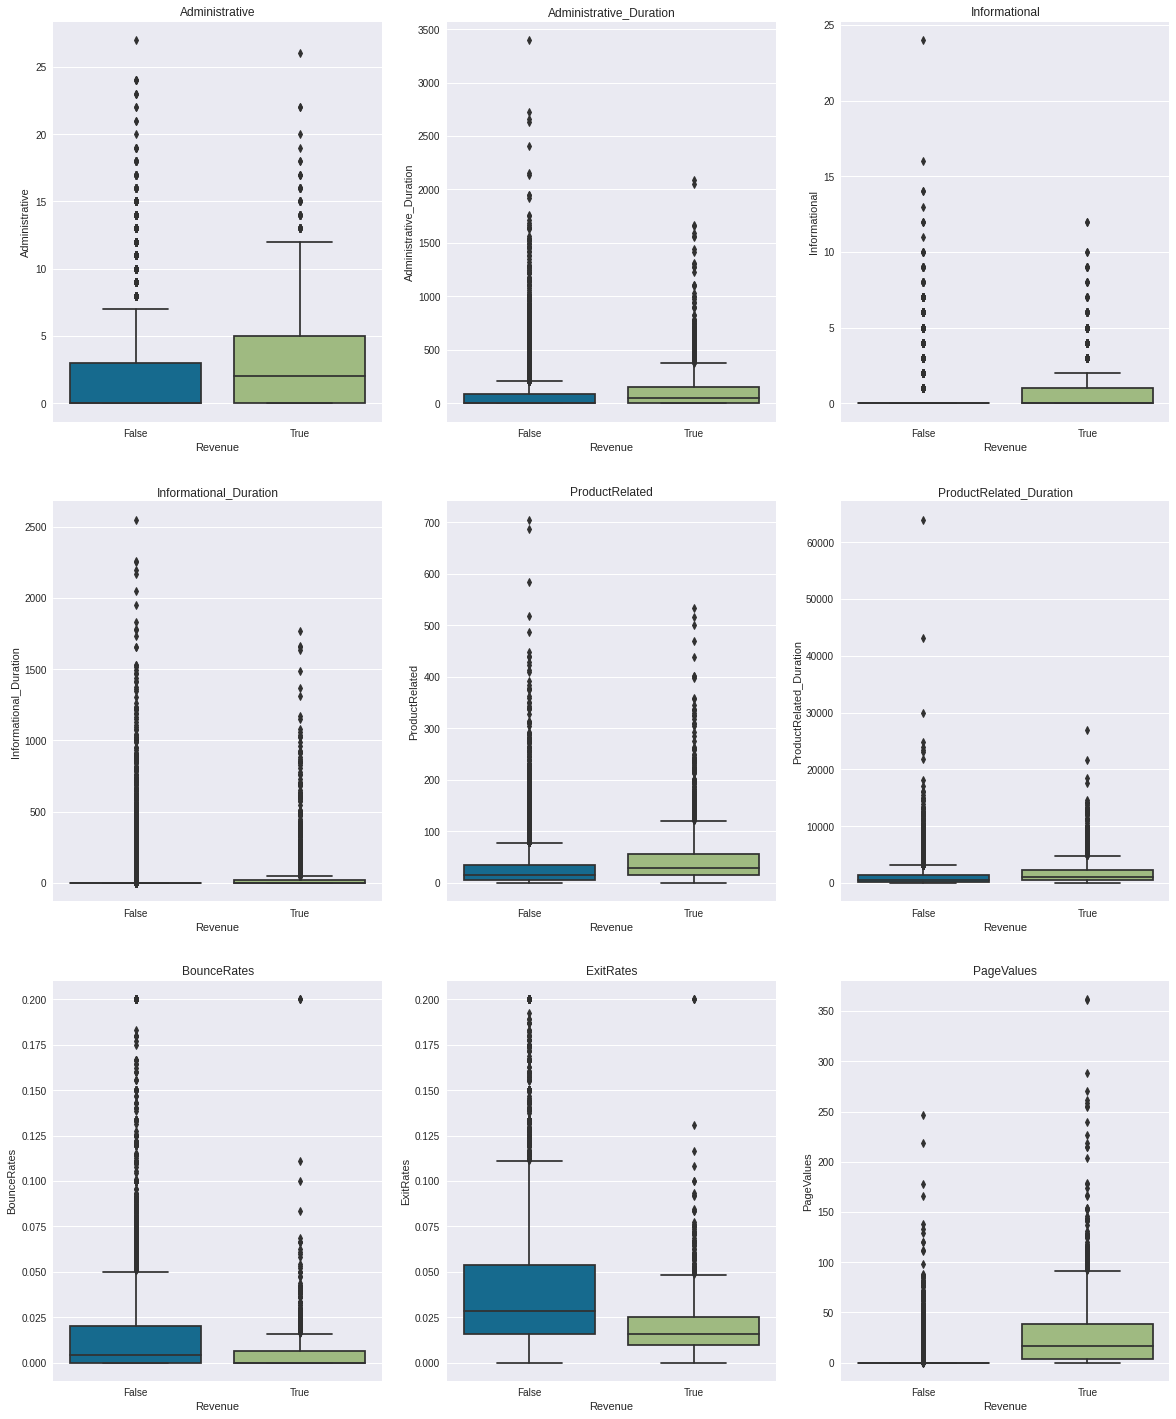

<IPython.core.display.Javascript object>

In [33]:
# Cria um subplot de dimensões 4 x 2
plt.figure(figsize=(20,25))

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(df[var_quantitativa]):
    ax = plt.subplot(3,3,idx+1)
    sns.boxplot(x=df['Revenue'], y=df[col])
    ax.set_title(col)

# Mostra o gráfico
plt.show()

Claramente há a necessidade de tratarmos os outliers do nossos dados para que eles não atrapalhem o treinamento do modelo.

# Pré-processamento

Transformar a variável alvo. False=0 e True=1 

In [34]:
# Aplicando a transformação
df['Revenue'] = df['Revenue'].map({True: 1,
                                   False: 0})
df['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

<IPython.core.display.Javascript object>

Transformar as variáveis categóricas em dummies

In [35]:
# Transformar as variáveis categóricas em dummies
dummies_df = pd.get_dummies(df[cat_vars])
dummies_df.head()

OperatingSystems_1  OperatingSystems_2  OperatingSystems_3  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   OperatingSystems_4  OperatingSystems_5  OperatingSystems_6  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_7  OperatingSystems_8  Browser_1  Browser_2  ...  \
0                   0                   0          1          0  ...   
1                   0                   0          0          1  ...   
2                   0                   0          1          0  ...   
3                   0                   0          0          1  ...   
4                   0                   0          0          0  ...   

   TrafficType_19  TrafficType_20  VisitorType_New_Visitor  VisitorType_Other  \
0               0               0                        0                  0   
1               0               0                        0                  0   
2               0               0                        0                  0   
3               0               0                        0                  0   
4               0               0                        0                  0   

   VisitorType_Returning_Visitor  SpecialDay_ant_dep_sd  \
0                              1                      1   
1                              1                      1   
2                              1                      1   
3                              1                      1   
4                              1                      1   

   SpecialDay_dias_10_antes  SpecialDay_dias_5_antes  Weekend_False  \
0                         0                        0              1   
1                         0                        0              1   
2                         0                        0              1   
3                         0                        0              1   
4                         0                        0              0   

   Weekend_True  
0             0  
1             0  
2             0  
3             0  
4             1  

[5 rows x 58 columns]

<IPython.core.display.Javascript object>

In [36]:
# Unir as variáveis dummies as variáveis quantitativas

# Selecionando os frames para unir
frames = [dummies_df, df[var_quantitativa], df['Revenue']]

#Operação para unir os frames
revenue_df = pd.concat(frames, axis=1)

# Visualizar o dataframe final
revenue_df.head()

OperatingSystems_1  OperatingSystems_2  OperatingSystems_3  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   OperatingSystems_4  OperatingSystems_5  OperatingSystems_6  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_7  OperatingSystems_8  Browser_1  Browser_2  ...  \
0                   0                   0          1          0  ...   
1                   0                   0          0          1  ...   
2                   0                   0          1          0  ...   
3                   0                   0          0          1  ...   
4                   0                   0          0          0  ...   

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                     -1.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                    -1.0               1                -1.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  Revenue  
0         0.20       0.20         0.0        0  
1         0.00       0.10         0.0        0  
2         0.20       0.20         0.0        0  
3         0.05       0.14         0.0        0  
4         0.02       0.05         0.0        0  

[5 rows x 68 columns]

<IPython.core.display.Javascript object>

**3** Separando o dataset em treino e teste

In [37]:
# Separar as variáveis preditoras da variável que queremos prever
X = revenue_df.drop('Revenue', axis=1)
y = revenue_df['Revenue']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

# Modelos

Nesta etapa do projeto, vamos realizar transformações nos dados, treinar os algorítmos de classificação, escolher o melhor modelo obtido atravéz da validação cruzada, testar esse modelo com os dados de teste e avaliar novamente os scores de desempenho do modelo. Após essa availiação, vamos escolher o modelo com o melhor desempenho nos dados com os dados de teste e otimizar esse modelo.

Os algorítmos utilizados são:
* Logistic Regression
* Decission Tree
* Random Forest
* AdaBoost Classifier
* Gradient Boosting
* Bagging Classifier

As métricas que vamos avaliar em cada modelo são:
* **ROC_AUC**: ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Diz o quanto o modelo é capaz de distinguir entre classes. Quanto maior a AUC, melhor será o modelo em prever 0s como 0s e 1s como 1s. 

* **MCC**: O coeficiente de correlação de Matthews leva em consideração verdadeiros e falsos positivos e negativos e geralmente é considerada uma medida equilibrada que pode ser usada mesmo se as classes forem de tamanhos muito diferentes. O MCC é basicamente um valor de coeficiente de correlação entre -1 e +1. Um coeficiente de +1 representa uma predição perfeita, 0 uma predição aleatória média e -1 uma predição inversa. 

Para cada rodada de treinamento dos algorítmos será realizada alguma transformação nos dados. Resumo dos modelos:
* **Modelo v1**: Não haverá qualquer tipo de pré-processamento.
* **Modelo v2**: Será tratados os outliers e balanceadas as classes.
* **Modelo v3**: Serão utilizados os dados com outliers tratados, classes balanceadas, além da transformação de potência (Power Transformer).
* **Modelo v4**: Também serão utilizados os dados com outliers tratados, classes balanceadas e aplicada transformação quantílica.

Também para cada modelo serão avaliadas as métricas de forma gráfica, utilizando o pacote Yellowbricks:
* **Curva ROC:** A Receiver Operating Characteristic (ROC) é uma medida da qualidade preditiva de um classificador que compara e visualiza a compensação entre a sensibilidade e a especificidade do modelo. Uma curva ROC exibe a taxa de TP no eixo Y e a taxa de FP no eixo X em uma média global e por classe. O ponto ideal é, portanto, o canto superior esquerdo do gráfico: falsos positivos são 0 e verdadeiros positivos são 1. A outra métrica, área sob a curva (AUC), que é um cálculo da relação entre falsos positivos e verdadeiros positivos. Quanto maior a AUC, melhor é o modelo em geral. 

* **Matriz de confusão: ** A Matriz de Confusão (Confusion Matrix Visualizer) é um visualizador de score que pega um classificador scikit-learn ajustado e um conjunto de teste X e y e retorna um relatório mostrando como cada uma das classes previstas dos valores de teste se compara às suas classes reais.

* **Curva de Precisão-Recuperação: ** As curvas de recuperação de precisão também é uma métrica usada para avaliar a qualidade de um classificador, especialmente quando as classes são muito desequilibradas. Quanto maior a área preenchida, mais forte é o classificador. A linha vermelha anota a precisão média , um resumo de todo o gráfico calculado como a média ponderada de precisão alcançada em cada limite, de modo que o peso é a diferença na recuperação do limite anterior.

* **Curva de Aprendizado: ** Uma curva de aprendizado mostra como o erro muda conforme o tamanho do conjunto de treinamento aumenta, ela mostra a relação entre a pontuação do treinamento e a pontuação do teste validado para um estimador com um número variável de amostras de treinamento. 

# Modelo v1

Para o modelo inicial, vamos testar os dados sem qualquer pré-processamento e avaliar o desempenho dos algorítmos. Posteriormente aplicaremos algumas transformações e treinaremos novamente os modelos.

Logistic Regression: 0.875235 (0.018388)
Decission Tree: 0.718580 (0.011993)
Random Forest: 0.906510 (0.013274)
AdaBoost Classifier: 0.900724 (0.013159)
Gradient Boosting: 0.912607 (0.012815)
Bagging Classifier: 0.877248 (0.013700)


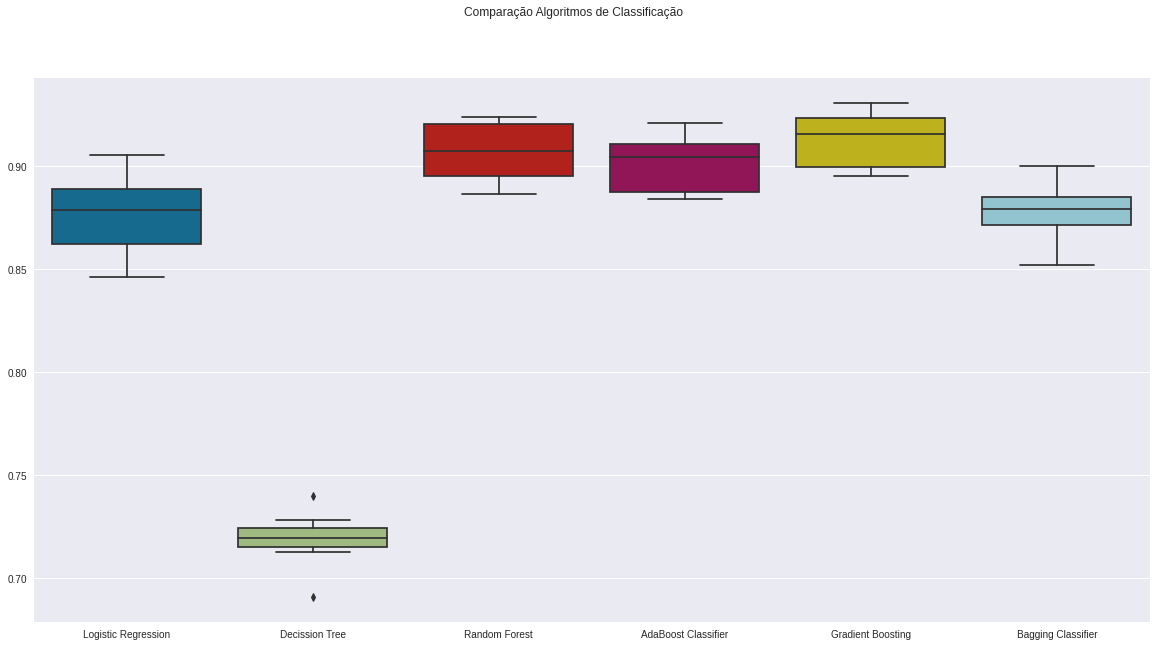

<IPython.core.display.Javascript object>

In [38]:
# Instanciando e criando uma lista com os algoritmos
modelos = []
modelos.append(('Logistic Regression', LogisticRegression(random_state=42)))
modelos.append(('Decission Tree', DecisionTreeClassifier(random_state=42)))
modelos.append(('Random Forest', RandomForestClassifier(random_state=42)))
modelos.append(('AdaBoost Classifier', AdaBoostClassifier(random_state=42)))
modelos.append(('Gradient Boosting', GradientBoostingClassifier(random_state=42)))
modelos.append(('Bagging Classifier', BaggingClassifier()))


# Lista de resultados e nomes dos modelos
resultados = []
nomes = []

# Seleção do melhor modelo por meio de uma validação cruzada
for nome, modelo in modelos:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = '%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Box-plot dos modelos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparação Algoritmos de Classificação')
ax = fig.add_subplot(111)
sns.boxplot(x=nomes, y=resultados)
ax.set_xticklabels(nomes)
plt.show()

Sem nenhum tipo de tratamento nos dados de treino já conseguimos atingir um **score roc_auc de 0.912607** com o **Gradient Boosting**, o que já é muito bom , visto que utilizamos *validação cruzada* para treinar os modelos. Vamos agora testar o melhor modelo com os dados de treino e avaliar se o modelo é generalizável. 

In [39]:
# Instanciando o modelo
v1_gboosting = GradientBoostingClassifier(random_state=42)

# Treinando o modelo
v1_gboosting.fit(X_train, y_train)

# Realizando as previsões
pred_v1 = v1_gboosting.predict(X_test)

# Salva a probabilidade prevista para cada classe em uma variável
p = v1_gboosting.predict_proba(X_test)[:, 1]

# Retorna ROCAUC para os dados de teste
print('ROCAUC Score:', (round(roc_auc_score(y_test, p), 3)))
print('MCC Score:', (round(matthews_corrcoef(y_test, pred_v1), 3)))
print('f1_score: ', (round(f1_score(y_test, pred_v1), 3)))

ROCAUC Score: 0.91
MCC Score: 0.536
f1_score:  0.596


<IPython.core.display.Javascript object>

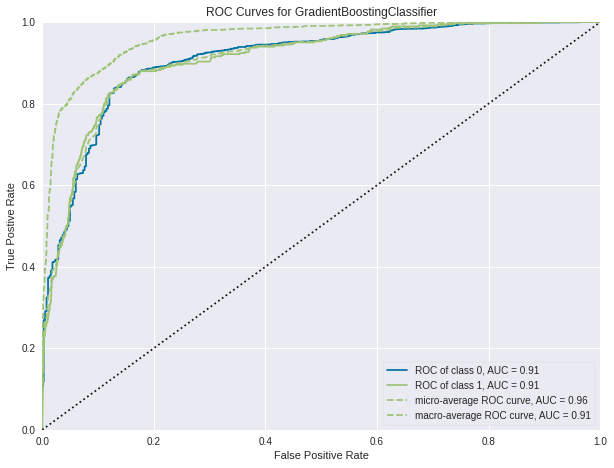

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

<IPython.core.display.Javascript object>

In [40]:
# Instanciando a curva ROCAUC
rocauc = ROCAUC(v1_gboosting, 
                size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
rocauc.fit(X_train, y_train)

# Avalie o modelo nos dados de teste
rocauc.score(X_test, y_test)

# Plota da curva ROCAUC
rocauc.show()

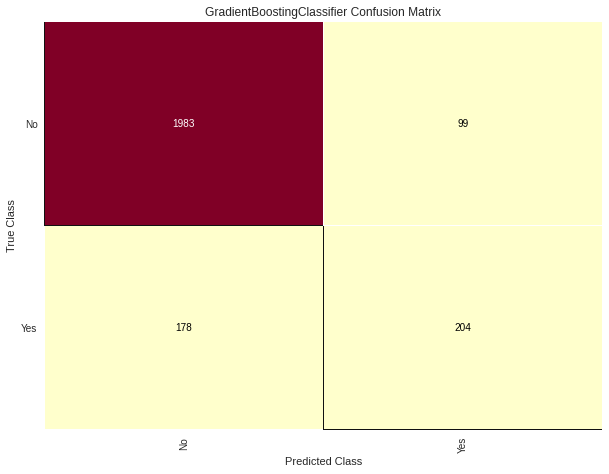

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [41]:
# Apresentando o modelo para ConfusionMatrix
conf_matrix = ConfusionMatrix(v1_gboosting, 
                              classes=['No', 'Yes'], 
                              size=(720, 540))

# Treina o modelo
conf_matrix.fit(X_train, y_train)

# Apresentando os dados de teste para a ConfusionMatrix
conf_matrix.score(X_test, y_test)

# Plot a Matriz de Confusão
conf_matrix.show()

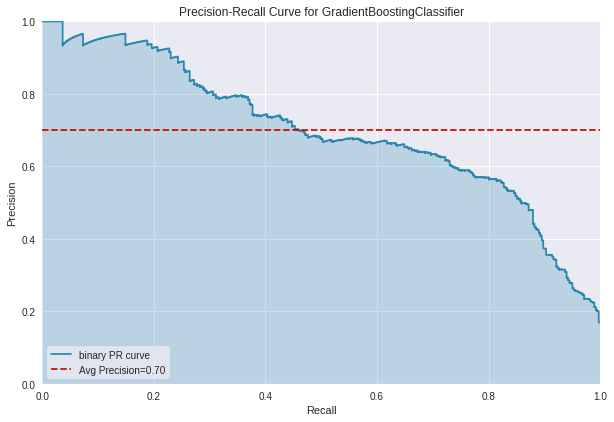

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

<IPython.core.display.Javascript object>

In [42]:
# Instanciando a curva de Precisão-Revocação
prec_curve = PrecisionRecallCurve(v1_gboosting, 
                                  size=(720, 480))

# Ajuste os dados de treinamento ao visualizador
prec_curve.fit(X_train, y_train)

# Avalie o modelo nos dados de teste
prec_curve.score(X_test, y_test)

# Plota da curva Precisão-Revocação
prec_curve.show()

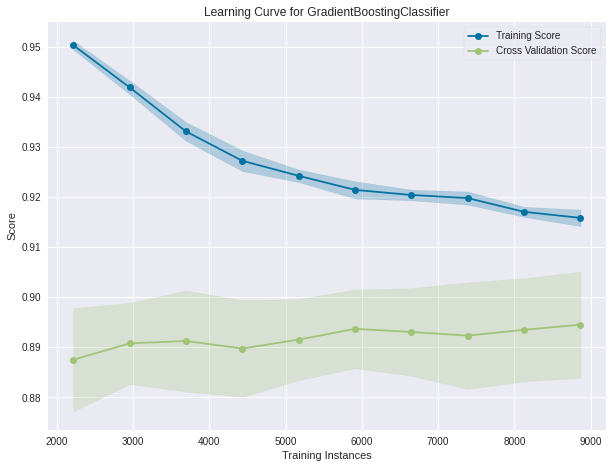

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

<IPython.core.display.Javascript object>

In [43]:
# Cria a divisão dos dados
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.25, 1.0, 10)

# Instanciando o modelo de classificação e o visualizador
visualizer = LearningCurve(v1_gboosting, 
                           cv=cv, 
                           scoring='f1_weighted', 
                           train_sizes=sizes, 
                           n_jobs=4, 
                           size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
visualizer.fit(X_train, y_train)

# Plota os scores da validação cruzada
visualizer.show()

# Modelo v2

Para o Modelo v2,  vamos tratar os outliers selecionando os valores que estão acima do **95º quantil**, substituí-los pelo próprio 95º quantil por se tratar de uma estratégia bastante conservadora.

A segunda transformação é aplicar o **Smote**, ou seja balancear os dados de treino do modelo. No ínicio, identificamos que há uma grande discrepância na **variável target** entre as sessões que **geraram receita** e as que **não geraram**, por isso a necessidade do balanceamento.   

In [44]:
# Fazer uma cópia do dataset dos dados de treino para tratar os outliers
X_train_1 = X_train.copy()

<IPython.core.display.Javascript object>

In [45]:
# Obtendo os valores do quantil .95
upper_quantile = (X_train_1[['Administrative', 'Administrative_Duration', 
                             'Informational', 'Informational_Duration', 
                             'ProductRelated', 'ProductRelated_Duration',
                             'BounceRates','ExitRates', 'PageValues']].quantile(.95))

# Coletando os outliers
outliers = (X_train_1[['Administrative', 'Administrative_Duration', 
                       'Informational', 'Informational_Duration', 
                       'ProductRelated', 'ProductRelated_Duration',
                       'BounceRates','ExitRates', 'PageValues']]>upper_quantile)

# Selecionando as variáveis com outliers
outliers_vars = ['Administrative', 'Administrative_Duration', 
                 'Informational', 'Informational_Duration', 
                 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates','ExitRates', 'PageValues']

# Aplicando a transformação
for i in outliers:
    X_train_1[outliers_vars] = X_train_1[outliers_vars].mask(outliers, upper_quantile, axis=1)

<IPython.core.display.Javascript object>

Agora vamos avaliar novamente os boxplots dessas variáveis e verificar o resultado do tratamento.

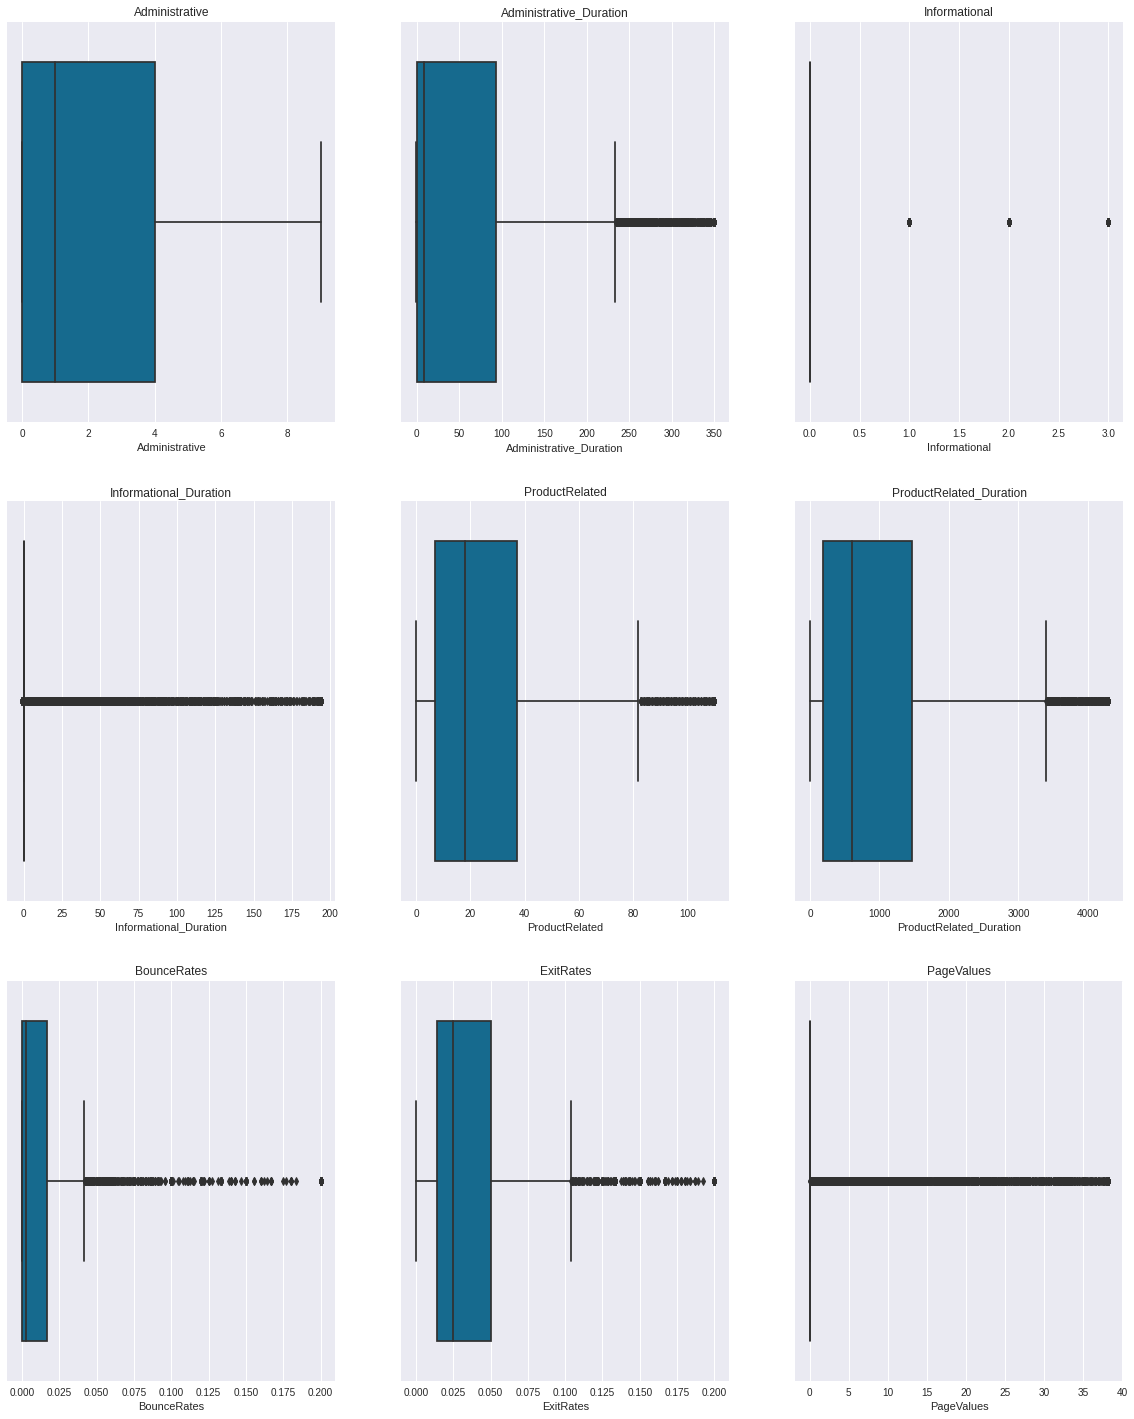

<IPython.core.display.Javascript object>

In [46]:
# Cria um subplot de dimensões 4 x 2
plt.figure(figsize=(20,25))

# Plota um gráfico de contagem para cada variável
for idx, col in enumerate(X_train_1[outliers_vars]):
    ax = plt.subplot(3,3,idx+1)
    sns.boxplot(x=X_train_1[col])
    ax.set_title(col)

# Mostra o gráfico
plt.show()

Após o **tratamento dos outliers**, não ouve mudanças tão significativas nos nossos dados, visto que busquei ser parcimoniosa.

A seguir, vamos aplicar o balanceamento do tipo **Smote**. *Smote consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos*.
Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados. Se o número de dados gerados for muito grande podemos ter um overfiting, por isso anteriormente avaliamos os modelos sem qualquer tipo de manipulação.

Como dito anteriormente, **essa não é a melhor prática caso estivessemos criando um modelo que seria posto em produção**, pois são dados que foram criados, mesmo que a partir de dados reais, e podem trazer viés para o modelo.

In [47]:
# Aplicar o balanceamento
smote = SMOTE()

# Aplicar ao conjunto de dados que foi tratado os outliers
X_train_1_balance, y_train_1_balance = smote.fit_sample(X_train_1, y_train)

# Mostra o resultado da função
print("Antes do SMOTE/Após o SMOTE")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_1_balance, return_counts=True)
print(dict(zip(unique, counts)))

Antes do SMOTE/Após o SMOTE
{0: 8326, 1: 1526}
{0: 8326, 1: 8326}


<IPython.core.display.Javascript object>

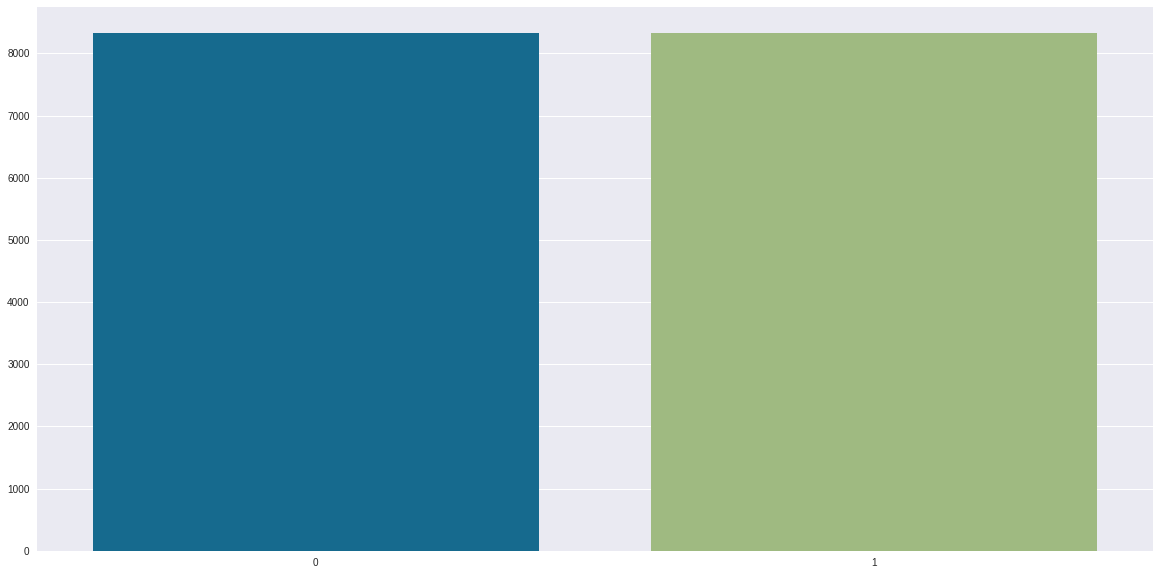

<IPython.core.display.Javascript object>

In [48]:
# Barplot da variável 'Revenue' após a aplicação do SMOTE
sns.barplot(x=y_train_1_balance.value_counts().index, 
            y=y_train_1_balance.value_counts().values)

plt.show()

Com os outilers tratados e aplicado o balanceamento nos dados, vamos gerar a **segunda versão do modelo** e avaliar os ganhos de desempenho obtido com as novas transformações.

Logistic Regression: 0.936809 (0.030448)
Decission Tree: 0.898948 (0.070895)
Random Forest: 0.986500 (0.024282)
AdaBoost Classifier: 0.977145 (0.037857)
Gradient Boosting: 0.978388 (0.033075)
Bagging Classifier: 0.975241 (0.035075)


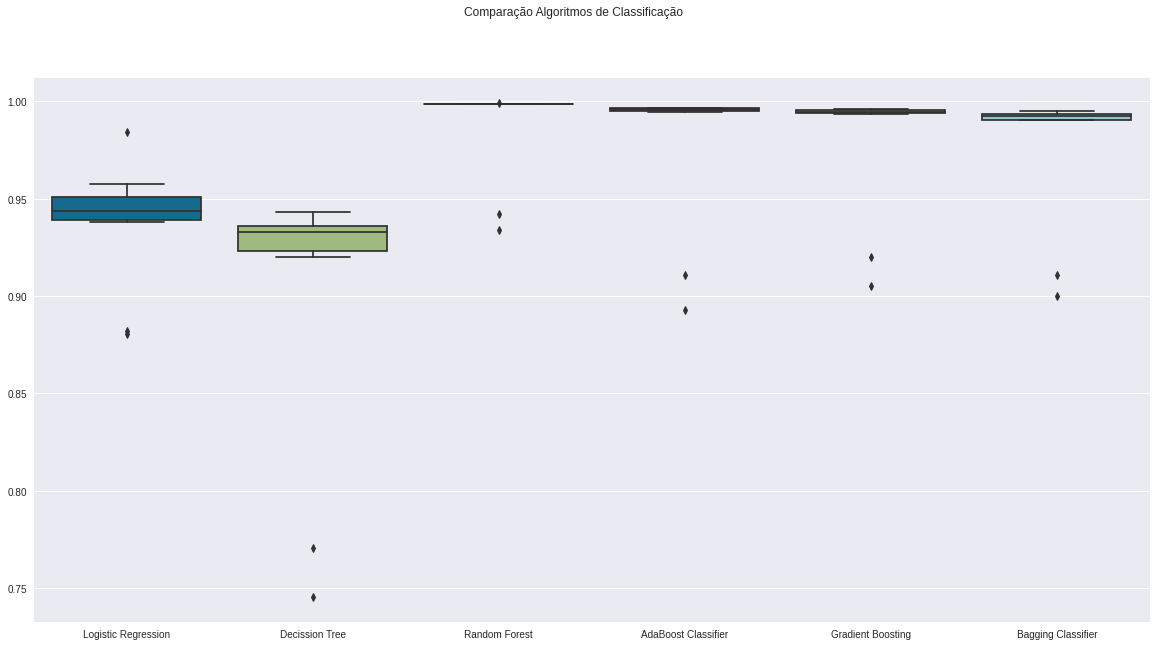

<IPython.core.display.Javascript object>

In [49]:
# Instanciando e criando uma lista com os algoritmos
modelos = []
modelos.append(('Logistic Regression', LogisticRegression(random_state=42)))
modelos.append(('Decission Tree', DecisionTreeClassifier(random_state=42)))
modelos.append(('Random Forest', RandomForestClassifier(random_state=42)))
modelos.append(('AdaBoost Classifier', AdaBoostClassifier(random_state=42)))
modelos.append(('Gradient Boosting', GradientBoostingClassifier(random_state=42)))
modelos.append(('Bagging Classifier', BaggingClassifier()))

# Lista de resultados e nomes dos modelos
resultados = []
nomes = []

# Seleção do melhor modelo por meio de uma validação cruzada
for nome, modelo in modelos:
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(modelo, X_train_1_balance, y_train_1_balance, cv=kfold, scoring='roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = '%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Box-plot dos modelos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparação Algoritmos de Classificação')
ax = fig.add_subplot(111)
sns.boxplot(x=nomes, y=resultados)
ax.set_xticklabels(nomes)
plt.show()

Nesta segunda rodada de treinamento dos modelos, com os dados balanceados e ajustado os outliers, obtivemos uma melhora nos nos scores, o algoritmo que apresentou o melhor score foi o **Random Forest**, com **roc_auc de 0.985829**. Esse já é um bom resultado, vamos testar com novos dados e avaliar se consegiremos melhor as predições do nosso modelo.

In [50]:
# Instanciando o modelo
v2_rforest = RandomForestClassifier(random_state=42)

# Treinando o modelo
v2_rforest.fit(X_train_1_balance, y_train_1_balance)

# Realizando as previsões
pred_v2 = v2_rforest.predict(X_test)

# Salva a probabilidade prevista para cada classe em uma variável
prob_v2 = v2_rforest.predict_proba(X_test)[:, 1]

# Retorna ROCAUC para os dados de teste
print('ROCAUC Score:', (round(roc_auc_score(y_test, prob_v2), 3)))
print('MCC Score:', (round(matthews_corrcoef(y_test, pred_v2), 3)))
print('f1_score: ', (round(f1_score(y_test, pred_v2), 3)))

ROCAUC Score: 0.906
MCC Score: 0.574
f1_score:  0.638


<IPython.core.display.Javascript object>

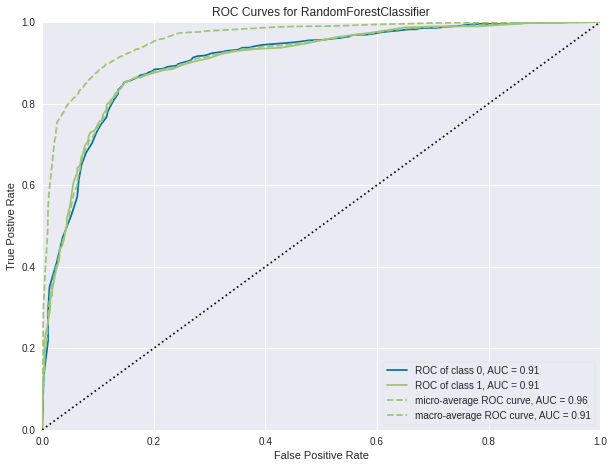

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

<IPython.core.display.Javascript object>

In [51]:
# Instanciando a curva ROCAUC
rocauc = ROCAUC(v2_rforest, 
                size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
rocauc.fit(X_train_1_balance, y_train_1_balance)

# Avalie o modelo nos dados de teste
rocauc.score(X_test, y_test)

# Plota da curva ROCAUC
rocauc.show()

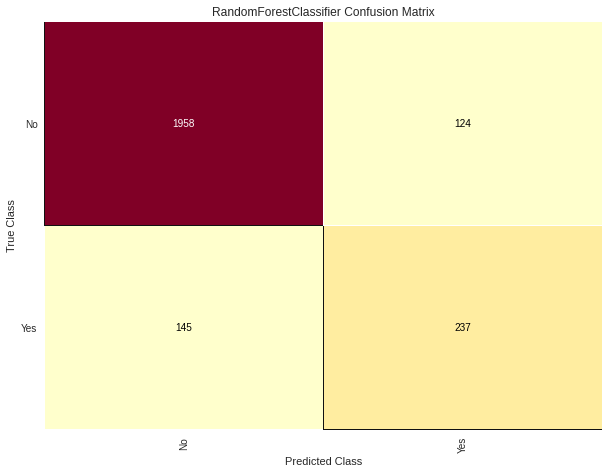

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [52]:
# Apresentando o modelo para ConfusionMatrix
conf_matrix = ConfusionMatrix(v2_rforest, 
                              classes=['No', 'Yes'], 
                              size=(720, 540))

# Treina o modelo
conf_matrix.fit(X_train_1_balance, y_train_1_balance)

# Apresentando os dados de teste para a ConfusionMatrix
conf_matrix.score(X_test, y_test)

# Plot a Matriz de Confusão
conf_matrix.show()

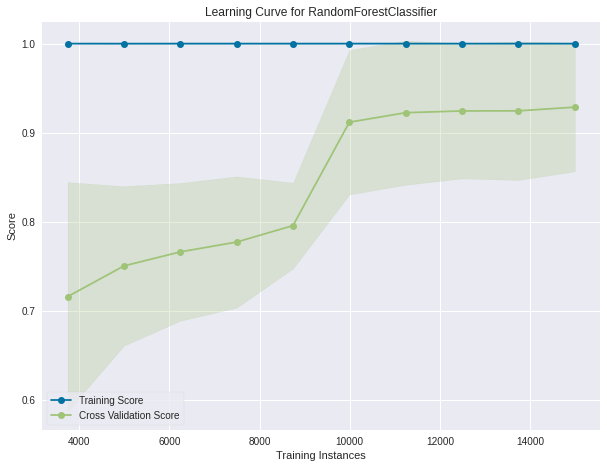

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

<IPython.core.display.Javascript object>

In [53]:
# Cria a divisão dos dados
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.25, 1.0, 10)

# Instanciando o modelo de classificação e o visualizador
visualizer = LearningCurve(v2_rforest, 
                           cv=cv, 
                           scoring='f1_weighted', 
                           train_sizes=sizes, 
                           n_jobs=4, 
                           size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
visualizer.fit(X_train_1_balance, y_train_1_balance)

# Plota os scores da validação cruzada
visualizer.show()

Como pudemos observar, o ROCAUC Score obtido atravéz do teste foi de **0.903** e ficou abaixo em relação ao movelo v1, ou seja, a generalização desse modelo é inferior ao modelo anterior.

Vamos prosseguir realizando novas transformações nos dados e testar para encontrar o modelo que melhor se ajustará aos dados.

# Modelo V3

In [54]:
var_quantitativa = ['Administrative', 'Administrative_Duration', 
                    'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates','ExitRates', 'PageValues']

<IPython.core.display.Javascript object>

Neste modelo, vamos aplicar potência às nossas variáveis quantitativas para tornar-las mais parecidas com **gaussianos**, isso é útil para modelar questões relacionadas à heterocedasticidade (variação não constante) ou outras situações em que a normalidade é desejada.
Nestes modelos vamos utilizar os dados que **tratamos os otliers** e que **balanceamos** para aplicar a **Power Transformer** e treinar os algorítmos.



LogisticRegression(random_state=42): 0.919208 (0.024074)
DecisionTreeClassifier(random_state=42): 0.883767 (0.031331)
RandomForestClassifier(random_state=42): 0.974007 (0.019109)
AdaBoostClassifier(random_state=42): 0.942841 (0.030471)
GradientBoostingClassifier(random_state=42): 0.955017 (0.022842)
BaggingClassifier(): 0.962023 (0.024639)


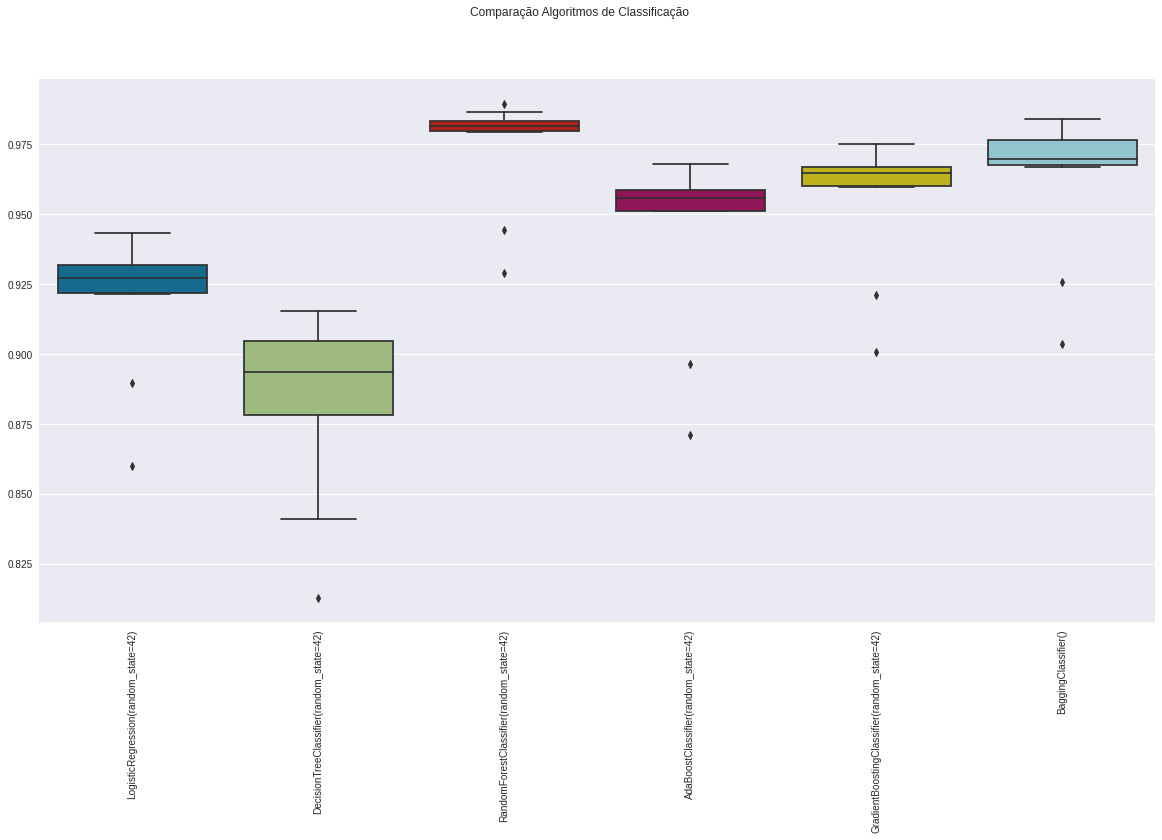

<IPython.core.display.Javascript object>

In [55]:
# Instanciando e criando uma lista com os algoritmos
preprocessor = ColumnTransformer(transformers=[('PowerTransf', PowerTransformer(), var_quantitativa)])

# Selecionando os algoritmos utilizados
modelos = [LogisticRegression(random_state=42),  
           DecisionTreeClassifier(random_state=42), 
           RandomForestClassifier(random_state=42), 
           AdaBoostClassifier(random_state=42), 
           GradientBoostingClassifier(random_state=42), 
           BaggingClassifier()]

# Obtendo os resultados
resultados = []
nomes= []

# Selecionando o melhor modelo com validação cruzada

for i, modelo in enumerate(modelos):
    
    # Definindo o pipeline para realizar a transformação nos dados e os modelos a serem treinados
    full_pipeline = Pipeline([('preprocessor', preprocessor), 
                              ('modelo', modelo)])
    # Validação cruzada
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(full_pipeline, X_train_1_balance, y_train_1_balance, cv = kfold, scoring = 'roc_auc')
    
    # Coletando os resultados do modelo
    resultados.append(cv_results)
    
    # Coletando os nomes dos modelos
    nomes.append(modelo)
    msg = '%s: %f (%f)' % (modelo, cv_results.mean(), cv_results.std())
    print(msg)

# Box-plot dos modelos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparação Algoritmos de Classificação')
ax = fig.add_subplot(111)
sns.boxplot(x=nomes, y=resultados)
ax.set_xticklabels(nomes)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Neste terceiro modelo, onde tratamos os outliers, balanceamos as classes e aplicamos potencia às variáveis quatitativas, obtivemos um resultado pouco inferior ao segundo modelo. O algorítmo que alcançou o melhor score roc_auc foi **RandomForestClassifier: 0.973849**.

In [56]:
# Instanciando o preprocessamento nos dados
preprocessor = ColumnTransformer(transformers=[('PowerTransf', PowerTransformer(), var_quantitativa)])

# Instanciando o modelo
mld_rforest = RandomForestClassifier(random_state=42)

# Criando o pipeline de dados
v3_rforest = Pipeline([('prepocesor', preprocessor), 
                       ('model', mld_rforest)])

# Treinando o modelo
v3_rforest.fit(X_train_1_balance, y_train_1_balance)

# Realizando as previsões
pred_v3 = v3_rforest.predict(X_test)

# Salva a probabilidade prevista para cada classe em uma variável
prob_v3 = v3_rforest.predict_proba(X_test)[:, 1]

# Retorna ROCAUC para os dados de teste
print('ROCAUC Score:', (round(roc_auc_score(y_test, prob_v3), 3)))
print('MCC Score:', (round(matthews_corrcoef(y_test, pred_v3), 3)))
print('f1_score: ', (round(f1_score(y_test, pred_v3), 3)))

ROCAUC Score: 0.885
MCC Score: 0.586
f1_score:  0.653


<IPython.core.display.Javascript object>

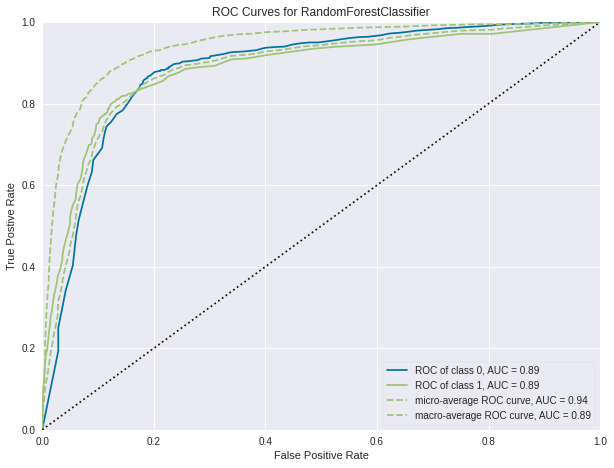

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

<IPython.core.display.Javascript object>

In [57]:
# Instanciando a curva ROCAUC
rocauc = ROCAUC(v3_rforest, 
                size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
rocauc.fit(X_train_1_balance, y_train_1_balance)

# Avalie o modelo nos dados de teste
rocauc.score(X_test, y_test)

# Plota da curva ROCAUC
rocauc.show()

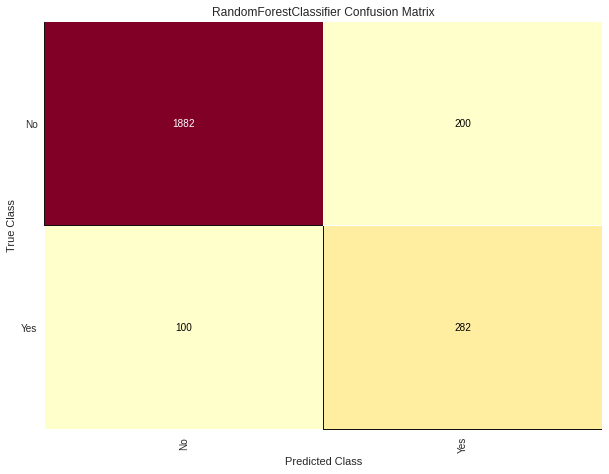

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [58]:
# Apresentando o modelo para ConfusionMatrix
conf_matrix = ConfusionMatrix(v3_rforest, 
                              classes=['No', 'Yes'], 
                              size=(720, 540))

# Treina o modelo
conf_matrix.fit(X_train_1_balance, y_train_1_balance)

# Apresentando os dados de teste para a ConfusionMatrix
conf_matrix.score(X_test, y_test)

# Plot a Matriz de Confusão
conf_matrix.show()

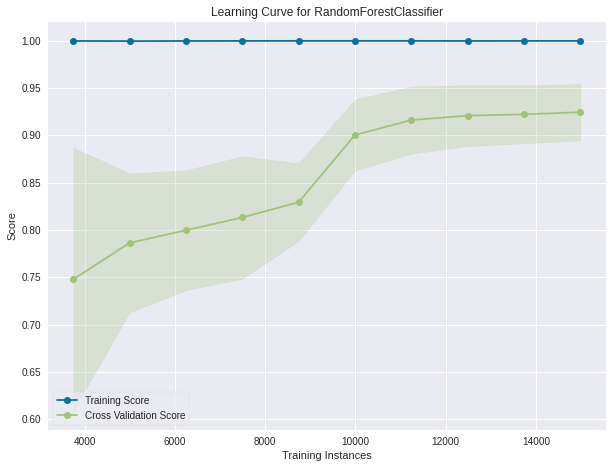

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

<IPython.core.display.Javascript object>

In [59]:
# Cria a divisão dos dados
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.25, 1.0, 10)

# Instanciando o modelo de classificação e o visualizador
visualizer = LearningCurve(v3_rforest, 
                           cv=cv, 
                           scoring='f1_weighted', 
                           train_sizes=sizes, 
                           n_jobs=4, 
                           size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
visualizer.fit(X_train_1_balance, y_train_1_balance)

# Plota os scores da validação cruzada
visualizer.show()

# Modelo v4

No modelo 4 vamos continuar utilizando os dados com os outliers tratados e as classes da variável target tratadas. Além disso, vamos aplicar a transformação quantilica com distribuição normal e avaliar o desempenho dos algorítmos.

LogisticRegression(random_state=42): 0.920910 (0.025782)
DecisionTreeClassifier(random_state=42): 0.883290 (0.031076)
RandomForestClassifier(random_state=42): 0.974116 (0.019213)
AdaBoostClassifier(random_state=42): 0.942843 (0.030472)
GradientBoostingClassifier(random_state=42): 0.954986 (0.022930)
BaggingClassifier(): 0.962329 (0.022688)


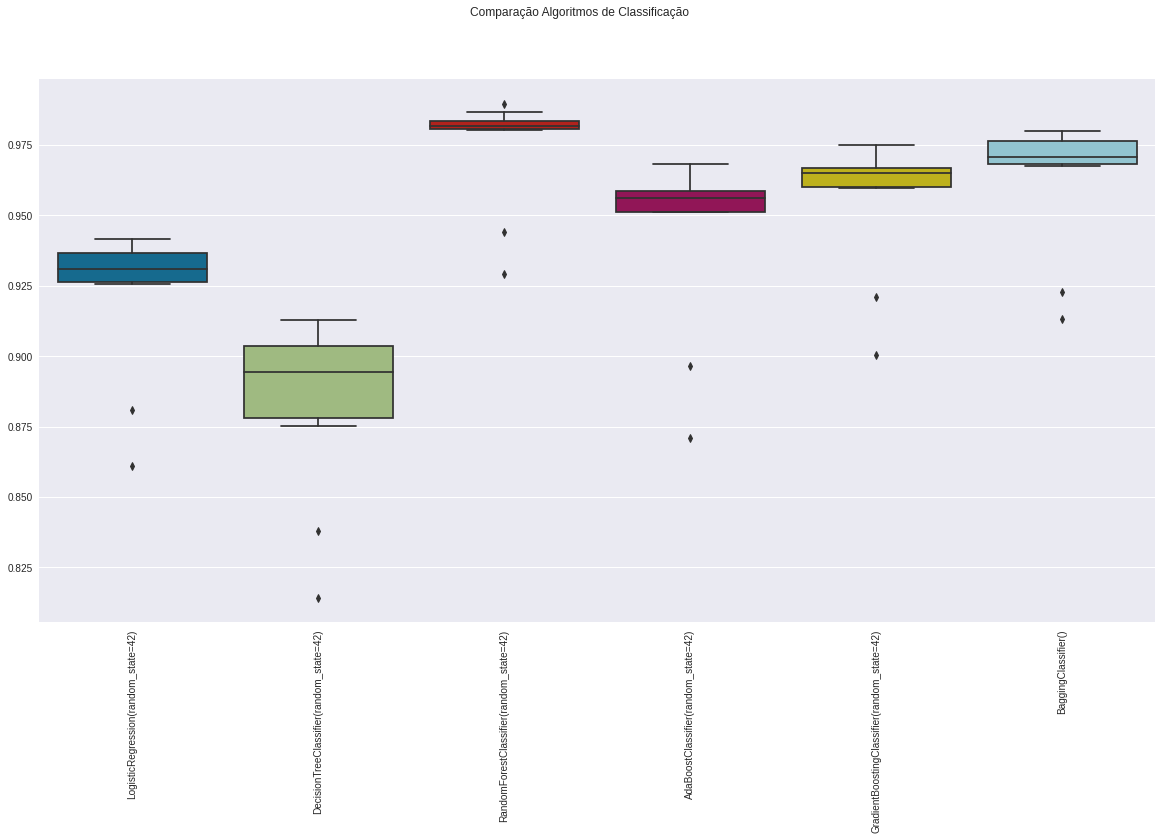

<IPython.core.display.Javascript object>

In [60]:
# Instanciando e criando uma lista com os algoritmos
preprocessor = ColumnTransformer(transformers=[('Quant_transf', 
                                                QuantileTransformer(output_distribution='normal'), 
                                                var_quantitativa)])

# Selecionando os algoritmos utilizados
modelos = [LogisticRegression(random_state=42),  
           DecisionTreeClassifier(random_state=42), 
           RandomForestClassifier(random_state=42), 
           AdaBoostClassifier(random_state=42), 
           GradientBoostingClassifier(random_state=42), 
           BaggingClassifier()]

# Obtendo os resultados
resultados = []
nomes= []

# Selecionando o melhor modelo com validação cruzada

for i, modelo in enumerate(modelos):
    
    # Definindo o pipeline para realizar a transformação nos dados e os modelos a serem treinados
    full_pipeline = Pipeline([('preprocessor', preprocessor), 
                              ('modelo', modelo)])
    # Validação cruzada
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(full_pipeline, X_train_1_balance, y_train_1_balance, cv = kfold, scoring = 'roc_auc')
    
    # Coletando os resultados do modelo
    resultados.append(cv_results)
    
    # Coletando os nomes dos modelos
    nomes.append(modelo)
    msg = '%s: %f (%f)' % (modelo, cv_results.mean(), cv_results.std())
    print(msg)

# Box-plot dos modelos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparação Algoritmos de Classificação')
ax = fig.add_subplot(111)
sns.boxplot(x=nomes, y=resultados)
ax.set_xticklabels(nomes)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Neste quarto treinamento, o algorítmo RandomForestClassifier obteve o melhor score roc_auc de 0.973238. Mesmo que seja um bom desempenho, o modelo versão 2 é o que apresentou o melhor desempenho e será o que iremos otimizá-lo e testar nossa aplicação. 

In [61]:
# Instanciando o preprocessamento nos dados
preprocessor = ColumnTransformer(transformers=[('Quant_transf', 
                                                QuantileTransformer(output_distribution='normal'), 
                                                var_quantitativa)])

# Instanciando o modelo
mld_rforest2 = RandomForestClassifier(random_state=42)

# Criando o pipeline de dados
v4_rforest = Pipeline([('prepocesor', preprocessor), ('model',mld_rforest2)])

# Treinando o modelo
v4_rforest.fit(X_train_1_balance, y_train_1_balance)

# Realizando as previsões
pred_v4 = v4_rforest.predict(X_test)

# Salva a probabilidade prevista para cada classe em uma variável
prob_v4 = v4_rforest.predict_proba(X_test)[:, 1]

# Retorna ROCAUC para os dados de teste
print('ROCAUC Score:', (round(roc_auc_score(y_test, prob_v4), 3)))
print('MCC Score:', (round(matthews_corrcoef(y_test, pred_v4), 3)))
print('f1_score: ', (round(f1_score(y_test, pred_v4), 3)))

ROCAUC Score: 0.885
MCC Score: 0.591
f1_score:  0.657


<IPython.core.display.Javascript object>

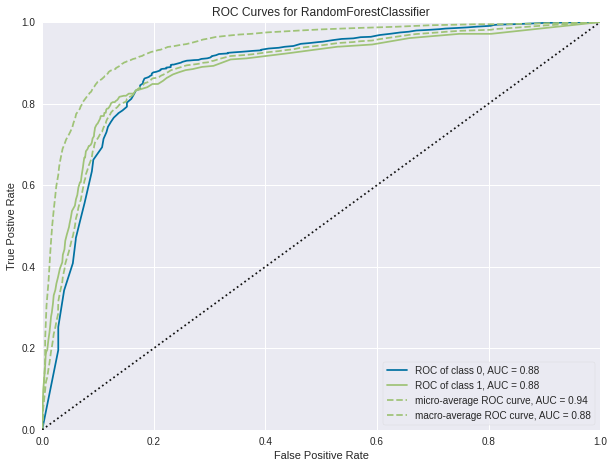

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

<IPython.core.display.Javascript object>

In [62]:
# Instanciando a curva ROCAUC
rocauc = ROCAUC(v4_rforest, 
                size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
rocauc.fit(X_train_1_balance, y_train_1_balance)

# Avalie o modelo nos dados de teste
rocauc.score(X_test, y_test)

# Plota da curva ROCAUC
rocauc.show()

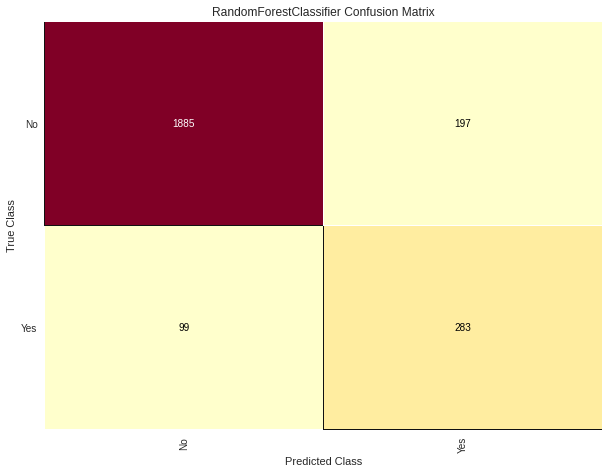

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [63]:
# Apresentando o modelo para ConfusionMatrix
conf_matrix = ConfusionMatrix(v4_rforest, 
                              classes=['No', 'Yes'], 
                              size=(720, 540))

# Treina o modelo
conf_matrix.fit(X_train_1_balance, y_train_1_balance)

# Apresentando os dados de teste para a ConfusionMatrix
conf_matrix.score(X_test, y_test)

# Plot a Matriz de Confusão
conf_matrix.show()

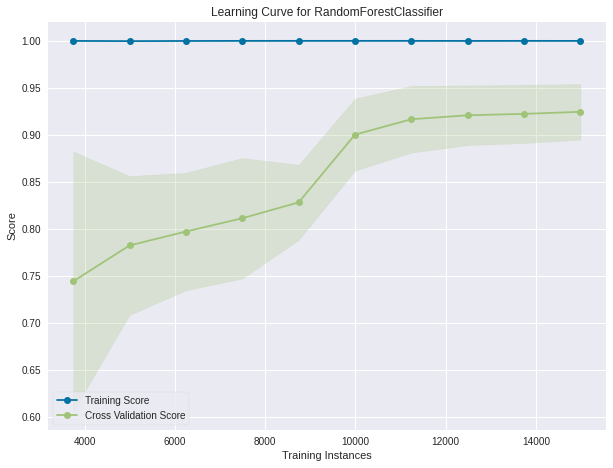

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

<IPython.core.display.Javascript object>

In [64]:
# Cria a divisão dos dados
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.25, 1.0, 10)

# Instanciando o modelo de classificação e o visualizador
visualizer = LearningCurve(v4_rforest, 
                           cv=cv, 
                           scoring='f1_weighted', 
                           train_sizes=sizes, 
                           n_jobs=4, 
                           size=(720, 540))

# Ajuste os dados de treinamento ao visualizador
visualizer.fit(X_train_1_balance, y_train_1_balance)

# Plota os scores da validação cruzada
visualizer.show()

# Otimização

In [65]:
# Criar a função para realizar a otimização
def objective(trial):
    params= {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1200),
        'max_depth' : trial.suggest_int('max_depth', 5, 25),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 25),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    # Pré-processamenta das variáveis
    preprocessor = ColumnTransformer(transformers=[('Quant_transf', 
                                                QuantileTransformer(output_distribution='normal'), 
                                                var_quantitativa)])
    # Modelo
    model = Pipeline([('preprocessor', preprocessor), 
                      ('RandonForest_v4',RandomForestClassifier(**params, 
                                                               oob_score=True,
                                                               random_state=42))])
    # Retorna a acurácia otbida na validação cruzada
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    
    return np.mean(cross_val_score(model, X_train_1_balance, y_train_1_balance, cv=kfold, n_jobs=-1, scoring='roc_auc'))

<IPython.core.display.Javascript object>

In [66]:
# Otimização dos hiperparâmetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2020-09-18 14:31:29,608] Trial 0 finished with value: 0.9570804068175891 and parameters: {'n_estimators': 1085, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 22, 'max_features': 'log2'}. Best is trial 0 with value: 0.9570804068175891.
[I 2020-09-18 14:32:01,761] Trial 1 finished with value: 0.957623333206447 and parameters: {'n_estimators': 348, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8, 'max_features': 'auto'}. Best is trial 1 with value: 0.957623333206447.
[I 2020-09-18 14:34:31,501] Trial 2 finished with value: 0.9666505979585018 and parameters: {'n_estimators': 1199, 'max_depth': 22, 'min_samples_leaf': 4, 'min_samples_split': 19, 'max_features': 'auto'}. Best is trial 2 with value: 0.9666505979585018.
[I 2020-09-18 14:35:41,929] Trial 3 finished with value: 0.9654356663999518 and parameters: {'n_estimators': 596, 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.96665059795850

<IPython.core.display.Javascript object>

In [67]:
print('The bests parameters are: ', study.best_params)
print('The bests scores values are: ', study.best_value)
print('The bests trials are: ', study.best_trial)

The bests parameters are:  {'n_estimators': 575, 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 5, 'max_features': 'auto'}
The bests scores values are:  0.9730244506554584
The bests trials are:  FrozenTrial(number=16, value=0.9730244506554584, datetime_start=datetime.datetime(2020, 9, 18, 14, 50, 53, 892076), datetime_complete=datetime.datetime(2020, 9, 18, 14, 52, 6, 418862), params={'n_estimators': 575, 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 5, 'max_features': 'auto'}, distributions={'n_estimators': IntUniformDistribution(high=1200, low=100, step=1), 'max_depth': IntUniformDistribution(high=25, low=5, step=1), 'min_samples_leaf': IntUniformDistribution(high=5, low=1, step=1), 'min_samples_split': IntUniformDistribution(high=25, low=5, step=1), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=16, state=TrialState.COMPLETE)


<IPython.core.display.Javascript object>

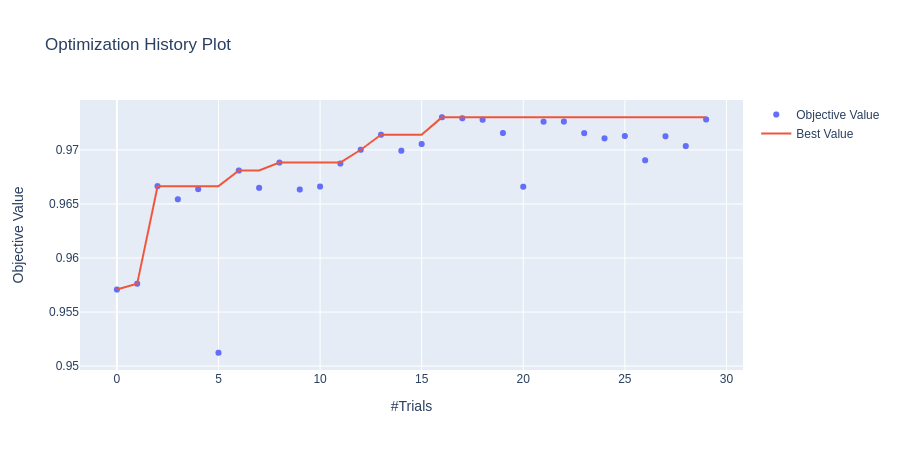

<IPython.core.display.Javascript object>

In [68]:
optuna.visualization.plot_optimization_history(study)

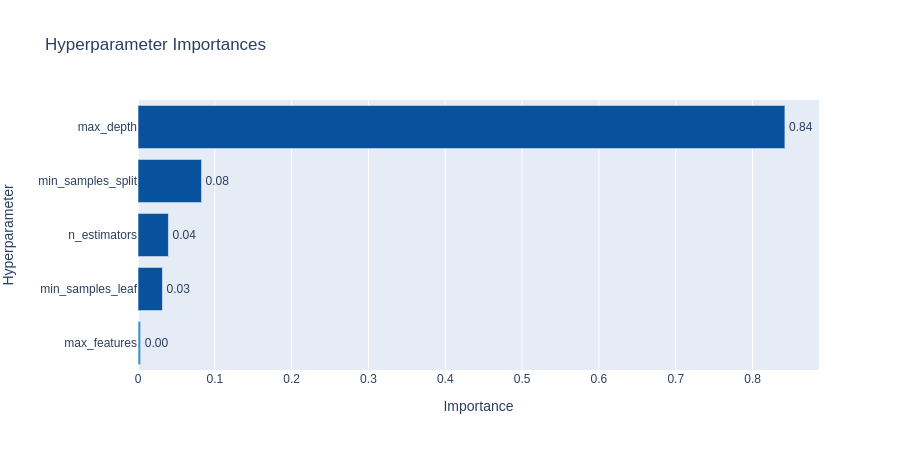

<IPython.core.display.Javascript object>

In [69]:
optuna.visualization.plot_param_importances(study)

In [72]:
# Instanciando o preprocessamento nos dados
preprocessor = ColumnTransformer(transformers=[('Quant_transf', 
                                                QuantileTransformer(output_distribution='normal'), 
                                                var_quantitativa)])

# Instanciando o modelo
mld_rforest_opt = RandomForestClassifier(n_estimators=575,
                                     max_depth=22,
                                     min_samples_leaf=1,
                                     min_samples_split=5,
                                     max_features='auto',
                                     random_state=42)

# Criando o pipeline de dados
v4_rforest = Pipeline([('prepocesor', preprocessor), ('model', mld_rforest_opt)])

# Treinando o modelo
mld_rforest_opt.fit(X_train_1_balance, y_train_1_balance)

# Realizando as previsões
pred_opt = mld_rforest_opt.predict(X_test)

# Salva a probabilidade prevista para cada classe em uma variável
prob_opt = mld_rforest_opt.predict_proba(X_test)[:, 1]

# Retorna ROCAUC para os dados de teste
print('ROCAUC Score:', (round(roc_auc_score(y_test, prob_opt), 3)))
print('MCC Score:', (round(matthews_corrcoef(y_test, pred_opt), 3)))
print('f1_score: ', (round(f1_score(y_test, pred_opt), 3)))

ROCAUC Score: 0.908
MCC Score: 0.574
f1_score:  0.64


<IPython.core.display.Javascript object>